# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?


Loan default prediction is critical for maintaining the financial health and profitability of banks and lending institutions. It allows banks to proactively identify high-risk customers and mitigate the likelihood of non-performing assets (NPAs), which can significantly erode profits. By leveraging predictive models, banks can make data-driven decisions to approve or deny loans, reducing the likelihood of defaults while ensuring responsible lending practices.

Additionally, accurate default prediction enhances operational efficiency by automating a traditionally labor-intensive process. This not only saves time and resources but also minimizes human biases and errors in decision-making. Furthermore, reliable prediction models improve customer trust by enabling fairer and more transparent evaluations, aligning the approval process with regulatory and ethical standards. Ultimately, loan default prediction protects the financial ecosystem by safeguarding the stability of lending institutions and ensuring credit accessibility for deserving borrowers.
### **The objective:**

 - What is the intended goal?

The primary goal of the loan default prediction problem is to develop a reliable model that accurately assesses the likelihood of an applicant defaulting on a loan. This ensures that banks and financial institutions can make informed decisions when approving or denying loans, reducing the risk of non-performing assets. By implementing predictive analytics, the objective extends to:

1. **Minimizing Financial Risks:** Identify high-risk applicants to avoid losses caused by loan defaults, thereby protecting the institution's profitability and stability.
   
2. **Improving Efficiency:** Automate the loan approval process, reducing the reliance on manual assessments that are time-consuming and prone to human error or bias.

3. **Enhancing Fairness and Transparency:** Remove subjective biases in the evaluation process, ensuring equitable treatment of applicants while adhering to regulatory standards.

4. **Customer-Centric Decision-Making:** Allow for tailored loan offerings and improve customer satisfaction by understanding borrower risk profiles better.

5. **Optimizing Resource Allocation:** Focus resources on low-risk customers and appropriate risk management strategies, contributing to the overall growth and sustainability of the financial ecosystem. 

The overarching objective is to balance financial prudence with inclusive and responsible lending practices.

### **The key questions:**

- What are the key questions that need to be answered?
Who are the high-risk customers?

Which features or factors most strongly indicate the likelihood of defaul.

### **The problem formulation**:

- What is it that we are trying to solve using data science?
  
Risk Identification

Accurately identify borrowers at a higher risk of defaulting on loans using predictive modeling techniques.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [65]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

from scipy.stats import zscore, mode, kstest


from sklearn.impute import KNNImputer

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier


# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, make_scorer

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [68]:
Loan=pd.read_csv('/Users/nasimrafie/Documents/data science/MIT/Capstone/hmeq.csv')

In [69]:
Loan.shape

(5960, 13)

**Observation**
- Dataset has 5960 rows and 13 columns. 

In [71]:
Loan.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [72]:
Loan.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [73]:
# Let us see the info of the data
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Observation**
- Out of the 12 features in the dataset, 10 are numeric, and 2 are categorical.
- The target and the feature "BAD" have no missing values, while all other features contain null values.

In [75]:
def detect_missing_percent(dt):
        S=dt.isnull().sum()
        P=S/len(dt) * 100
        missing_data_df = pd.DataFrame({
            'Sum of Missing': S,
            'Percentage of Missing (%)': P
        })
        print(missing_data_df)

detect_missing_percent(Loan)

         Sum of Missing  Percentage of Missing (%)
BAD                   0                   0.000000
LOAN                  0                   0.000000
MORTDUE             518                   8.691275
VALUE               112                   1.879195
REASON              252                   4.228188
JOB                 279                   4.681208
YOJ                 515                   8.640940
DEROG               708                  11.879195
DELINQ              580                   9.731544
CLAGE               308                   5.167785
NINQ                510                   8.557047
CLNO                222                   3.724832
DEBTINC            1267                  21.258389


**Observation**
- Among the 11 features with missing values, only "DEBTINC" and "DEROG" have higher missing rates at 11.87% and 21.2%, respectively, while the rest have less than 10% missing values.

In [77]:
# Checking the count of unique values in each column
Loan.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

In [78]:
duplicate_indices = Loan.index.duplicated()
duplicate_indices.sum()

0

**Observation**
- There is no duplicated values in dataset.

In [80]:
Loan.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

- On the basis of number of unique values in each column and the data type from .info code, we can identify the **continuous** and **categorical** columns in the data. 

In [82]:
# Creating numerical columns
num_cols = ['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']

# Creating categorical variables
cat_cols = ['REASON','JOB','BAD']

In [83]:
Loan.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


## Summary Statistics

- Observations from Summary Statistics

In [86]:
# Checking summary statistics
Loan.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BAD,5960.0,NaN,NaN,NaN,0.199497,0.399656,0.0,0.0,0.0,0.0,1.0
LOAN,5960.0,NaN,NaN,NaN,18607.969799,11207.480417,1100.0,11100.0,16300.0,23300.0,89900.0
MORTDUE,5442.0,NaN,NaN,NaN,73760.8172,44457.609458,2063.0,46276.0,65019.0,91488.0,399550.0
VALUE,5848.0,NaN,NaN,NaN,101776.048741,57385.775334,8000.0,66075.5,89235.5,119824.25,855909.0
REASON,5708,2,DebtCon,3928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JOB,5681,6,Other,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOJ,5445.0,NaN,NaN,NaN,8.922268,7.573982,0.0,3.0,7.0,13.0,41.0
DEROG,5252.0,NaN,NaN,NaN,0.25457,0.846047,0.0,0.0,0.0,0.0,10.0
DELINQ,5380.0,NaN,NaN,NaN,0.449442,1.127266,0.0,0.0,0.0,0.0,15.0
CLAGE,5652.0,NaN,NaN,NaN,179.766275,85.810092,0.0,115.116702,173.466667,231.562278,1168.233561


In [87]:
for column in cat_cols:
    print(Loan[column].value_counts(dropna=False , normalize = True))
    print('-'*50)

REASON
DebtCon    0.659060
HomeImp    0.298658
NaN        0.042282
Name: proportion, dtype: float64
--------------------------------------------------
JOB
Other      0.400671
ProfExe    0.214094
Office     0.159060
Mgr        0.128691
NaN        0.046812
Self       0.032383
Sales      0.018289
Name: proportion, dtype: float64
--------------------------------------------------
BAD
0    0.800503
1    0.199497
Name: proportion, dtype: float64
--------------------------------------------------


**Observations**

- Loan amounts granted range from  `$`1,100 to `$`89,900, with an average of `$`18,608.  
- Clients have outstanding mortgage balances ranging from `$`2,063 to `$`399,550, with an average of `$`73,761.  
- The current value of clients' properties ranges between `$`8,000 and `$`855,909, with an average value of `$`101,776.  
- Debt consolidation is the primary reason for requesting loans, accounting for 65% of cases.  
- The majority of clients seeking loans are employed in roles other than "ProfExe," "Office," "Mgr," "Self," or "Sales," representing 40% of applicants. These clients have work experience ranging from 0 to 41 years, with an average of 8.9 years.  
- The number of delinquent credit lines among clients ranges from 0 to 15, with an average of 0.4. The number of major derogatory reports ranges from 0 to 10, with an average of 0.25.  
- The age of the oldest credit line among clients ranges from 0 to 1,168.23 months (which is noise for sure), with an average of 179.77 months.  
- Recent credit inquiries by clients range from 0 to 17, with an average of 1.19.  
- The number of existing credit lines for clients ranges from 0 to 71, with an average of 21.3.  
- Clients' debt-to-income ratios range from 0.52 to 203.31, with an average of 33.78.  


## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


#### **Univariate Analysis for numerical data**


In [94]:
def histogram_boxplot(feature,feature_name, figsize=(10, 5), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    print(f"Feature: {feature_name}")
    print('Skew :',round(feature.skew(), 2))

    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

Feature: LOAN
Skew : 2.02


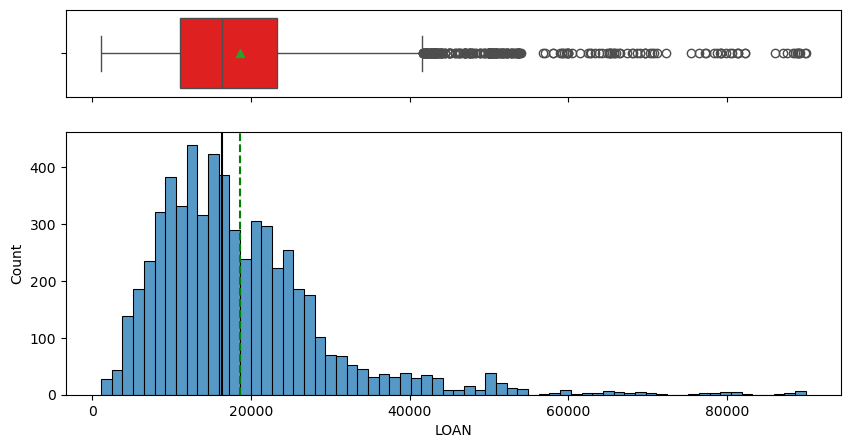

Loan amount with maximum count: 15000
Count of this LOAN amount: 105


In [95]:
p = histogram_boxplot(Loan['LOAN'],'LOAN')
plt.show()

most_common_LOAN = Loan['LOAN'].mode()[0]  # Get the mode (most common value)
max_count = (Loan['LOAN'] == most_common_LOAN).sum()  # Count occurrences of the mode

print(f"Loan amount with maximum count: {most_common_LOAN}")
print(f"Count of this LOAN amount: {max_count}")

Feature: MORTDUE
Skew : 1.81


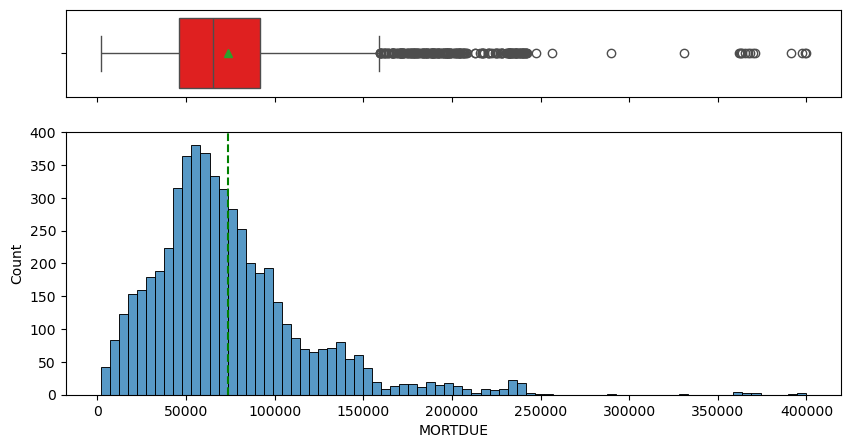

MORTDUE amount with maximum count: 42000.0
Count of this MORTDUE amount: 11


In [96]:
p = histogram_boxplot(Loan['MORTDUE'],'MORTDUE')
plt.show()
most_common_MORTDUE = Loan['MORTDUE'].mode()[0]  # Get the mode (most common value)
max_count = (Loan['MORTDUE'] == most_common_MORTDUE).sum()  # Count occurrences of the mode

print(f"MORTDUE amount with maximum count: {most_common_MORTDUE}")
print(f"Count of this MORTDUE amount: {max_count}")

Feature: VALUE
Skew : 3.05


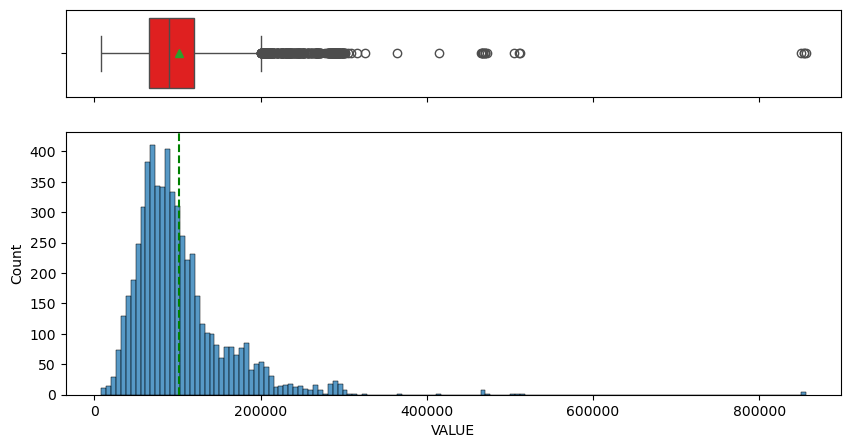

VALUE amount with maximum count: 42000.0
Count of this VALUE amount: 15


In [97]:
p = histogram_boxplot(Loan['VALUE'],'VALUE')
plt.show()
most_common_VALUE = Loan['VALUE'].mode()[0]  # Get the mode (most common value)
max_count = (Loan['VALUE'] == most_common_VALUE).sum()  # Count occurrences of the mode

print(f"VALUE amount with maximum count: {most_common_MORTDUE}")
print(f"Count of this VALUE amount: {max_count}")

Feature: YOJ
Skew : 0.99


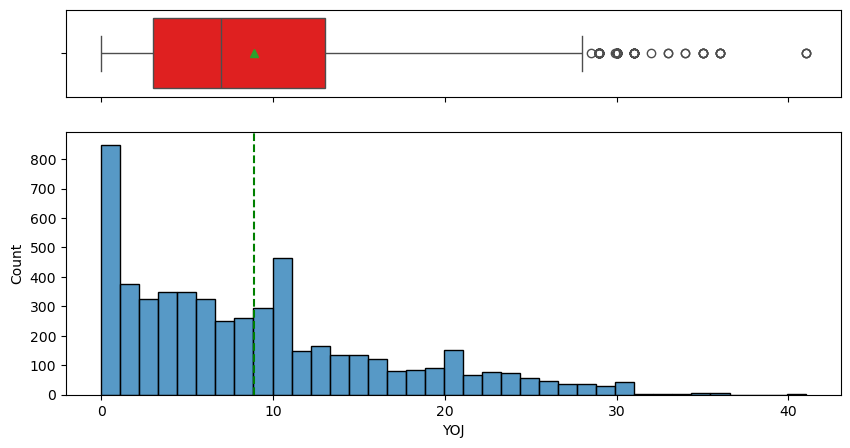

YOJ amount with maximum count: 0.0
Count of this YOJ amount: 415


In [98]:
p = histogram_boxplot(Loan['YOJ'],'YOJ')
plt.show()
most_common_YOJ = Loan['YOJ'].mode()[0]  # Get the mode (most common value)
max_count = (Loan['YOJ'] == most_common_YOJ).sum()  # Count occurrences of the mode

print(f"YOJ amount with maximum count: {most_common_YOJ}")
print(f"Count of this YOJ amount: {max_count}")

Feature: DEROG
Skew : 5.32


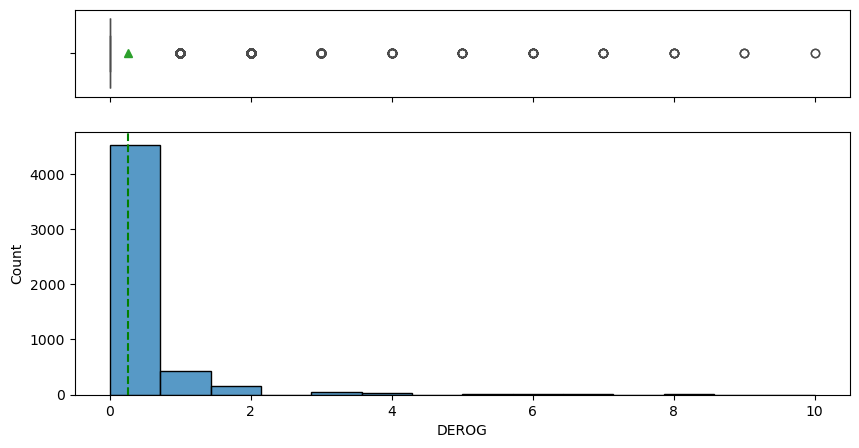

DEROG amount with maximum count: 0.0
Count of this DEROG amount: 4527


In [99]:
p = histogram_boxplot(Loan['DEROG'],'DEROG')
plt.show()
most_common_DEROG = Loan['DEROG'].mode()[0]  # Get the mode (most common value)
max_count = (Loan['DEROG'] == most_common_DEROG).sum()  # Count occurrences of the mode

print(f"DEROG amount with maximum count: {most_common_DEROG}")
print(f"Count of this DEROG amount: {max_count}")

Feature: DELINQ
Skew : 4.02


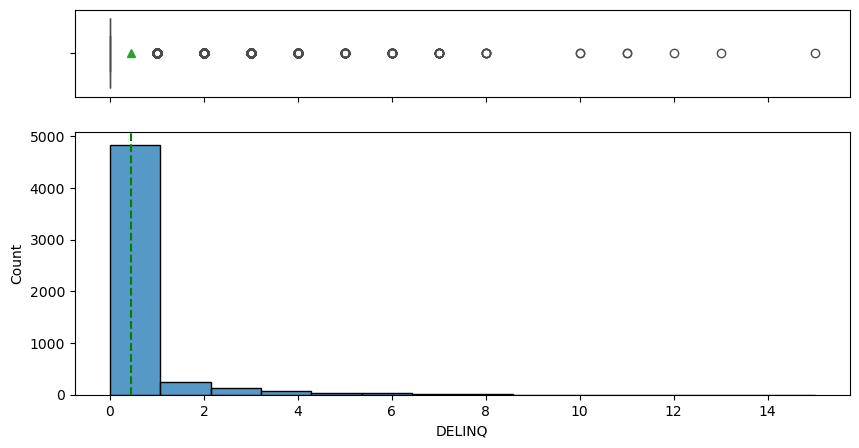

DELINQ amount with maximum count: 0.0
Count of this DELINQ amount: 4179


In [100]:
p = histogram_boxplot(Loan['DELINQ'],'DELINQ')
plt.show()
most_common_DELINQ = Loan['DELINQ'].mode()[0]  # Get the mode (most common value)
max_count = (Loan['DELINQ'] == most_common_DELINQ).sum()  # Count occurrences of the mode

print(f"DELINQ amount with maximum count: {most_common_DEROG}")
print(f"Count of this DELINQ amount: {max_count}")

Feature: CLAGE
Skew : 1.34


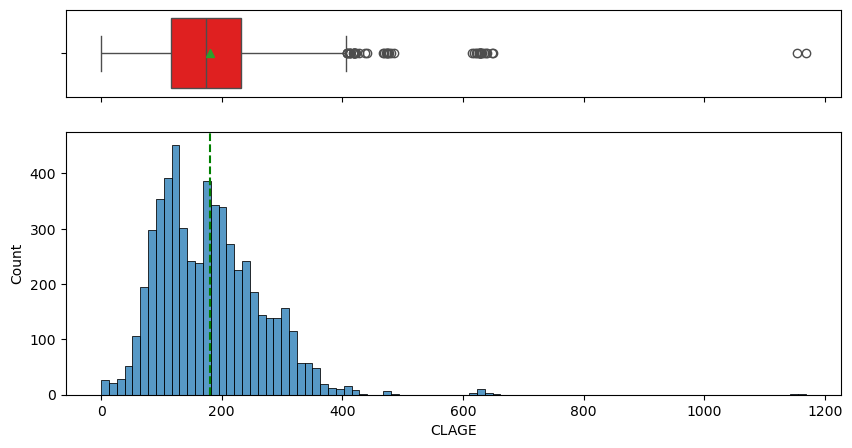

CLAGE amount with maximum count: 102.5
Count of this CLAGE amount: 7


In [101]:
p = histogram_boxplot(Loan['CLAGE'],'CLAGE')
plt.show()
most_common_CLAGE = Loan['CLAGE'].mode()[0]  # Get the mode (most common value)
max_count = (Loan['CLAGE'] == most_common_CLAGE).sum()  # Count occurrences of the mode

print(f"CLAGE amount with maximum count: {most_common_CLAGE}")
print(f"Count of this CLAGE amount: {max_count}")

Feature: NINQ
Skew : 2.62


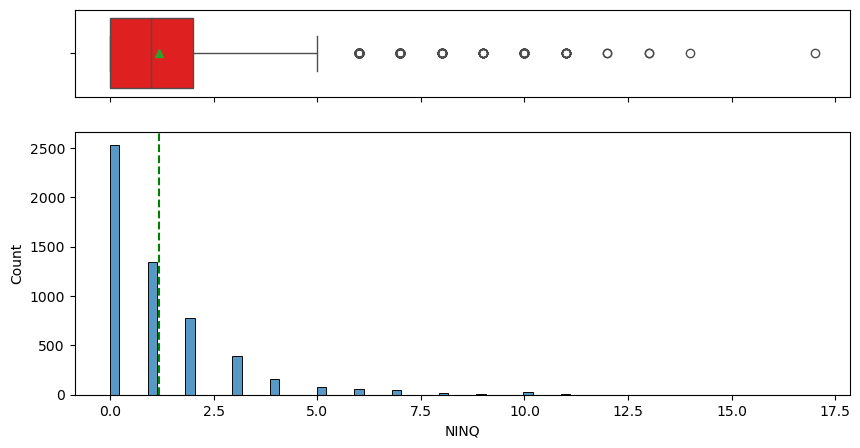

NINQ amount with maximum count: 0.0
Count of this NINQ amount: 2531


In [102]:
p = histogram_boxplot(Loan['NINQ'],'NINQ')
plt.show()
most_common_NINQ = Loan['NINQ'].mode()[0]  # Get the mode (most common value)
max_count = (Loan['NINQ'] == most_common_NINQ).sum()  # Count occurrences of the mode

print(f"NINQ amount with maximum count: {most_common_NINQ}")
print(f"Count of this NINQ amount: {max_count}")

Feature: CLNO
Skew : 0.78


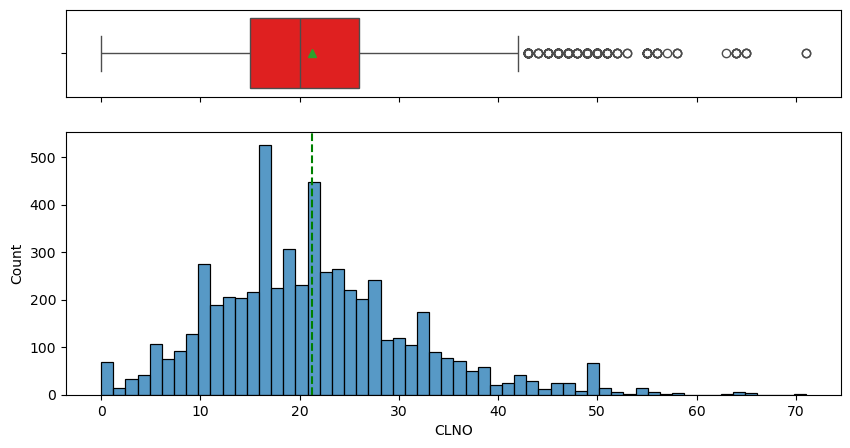

CLNO amount with maximum count: 16.0
Count of this CLNO amount: 316


In [103]:
p = histogram_boxplot(Loan['CLNO'],'CLNO')
plt.show()
most_common_CLNO = Loan['CLNO'].mode()[0]  # Get the mode (most common value)
max_count = (Loan['CLNO'] == most_common_CLNO).sum()  # Count occurrences of the mode

print(f"CLNO amount with maximum count: {most_common_CLNO}")
print(f"Count of this CLNO amount: {max_count}")

Feature: DEBTINC
Skew : 2.85


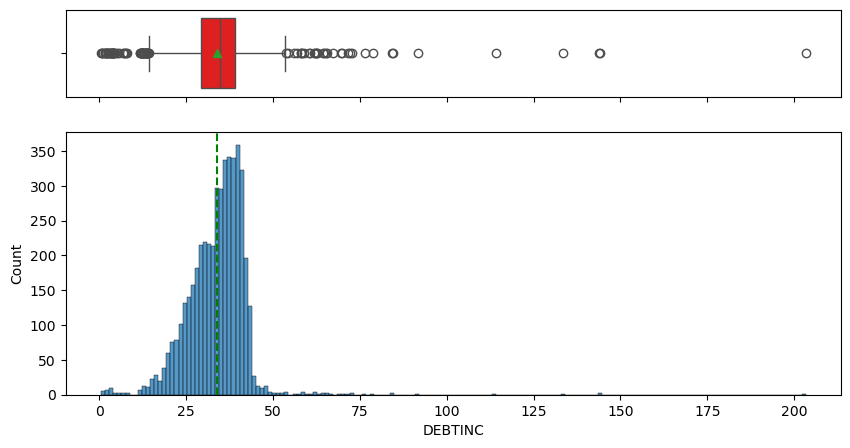

In [104]:
p = histogram_boxplot(Loan['DEBTINC'],'DEBTINC')
plt.show()


**Observations**

- The **Loan distribution** is right-skewed, ranging from `$1,100` to `$89,900`, with an average of `$18,608`. Several loan amounts exceed 1.5 IQR and are considered outliers in the box plot. The loan amount of `$15,000` appears most frequently, with 105 clients receiving it.

- The **Mortude distribution** (mortgage balances) is right-skewed, ranging from `$2,063` to `$399,550`, with an average of `$73,761`. Some mortgage balances exceed 1.5 IQR and are identified as outliers in the box plot. The most common mortgage balance is `$42,000`, observed for 11 clients.

- The **Value distribution** (current property value) is right-skewed, ranging from `$8,000` to `$855,909`, with an average of `$101,776`. Several property values exceed 1.5 IQR and are considered outliers. The value `$42,000` is the most frequent, appearing for 15 clients.

- The **YOJ distribution** (years of work experience) is right-skewed, with clients having between 0 to 41 years of experience, and an average of 8.9 years. Many work experience values exceed 1.5 IQR and are outliers. Zero years of work experience is the most common, with 415 clients in this category.

- The **DEROG distribution** (number of major derogatory reports) is right-skewed, ranging from 0 to 10, with an average of 0.25. Several derogatory report values exceed 1.5 IQR and are outliers. A total of 4,527 clients have 0 derogatory reports, making it the most frequent value.

- The **DELINQ distribution** (number of delinquent credit lines) is right-skewed, ranging from 0 to 15, with an average of 0.4. Some delinquent credit line values exceed 1.5 IQR and are considered outliers. The most common value is 0, observed for 4,179 clients.

- The **CLAGE distribution** (age of the oldest credit line) is right-skewed, ranging from 0 to 1,168.23 months, with an average of 179.77 months. Several values exceed 1.5 IQR and are outliers. The age of 102.5 months is the most frequent, with 11 clients in this category.

- The **NINQ distribution** (number of recent credit inquiries) is right-skewed, ranging from 0 to 17, with an average of 1.19. Some recent credit inquiries exceed 1.5 IQR and are considered outliers. The most common value is 0 inquiries, observed for 2,531 clients.

- The **CLNO distribution** (number of existing credit lines) is right-skewed, ranging from 0 to 71, with an average of 21.3. Several values exceed 1.5 IQR and are outliers. The most common number of credit lines is 16, observed for 316 clients.

- The **DEBTINC distribution** (debt-to-income ratio) is right-skewed, ranging from 0.52 to 203.31, with an average of 33.78. Some debt-to-income ratios exceed 1.5 IQR and are identified as outliers. A debt-to-income ratio of 16 appears most frequently, observed for 316 clients.







#### **Univariate Analysis for categorical data**


In [107]:
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (10, 5))
    
    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')
    
    ax = sns.countplot(x=z, data=data, hue=z, palette='Paired', order=data[z].value_counts().index)
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage 
        
    plt.show()   

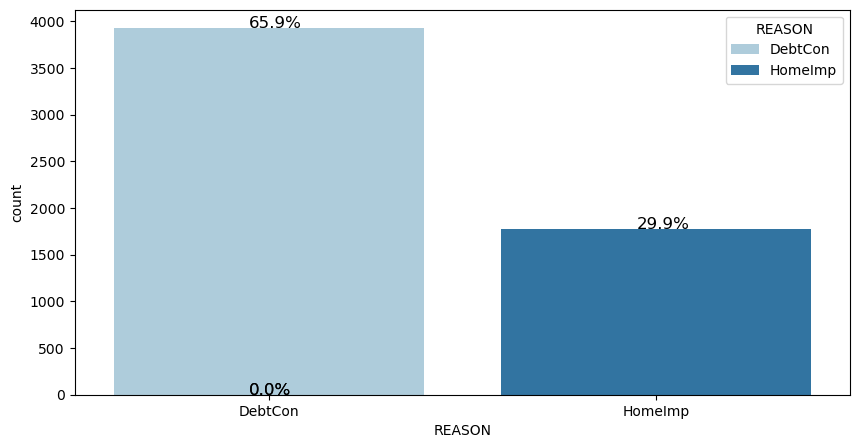

In [108]:
p = bar_perc(Loan,'REASON')

plt.show()

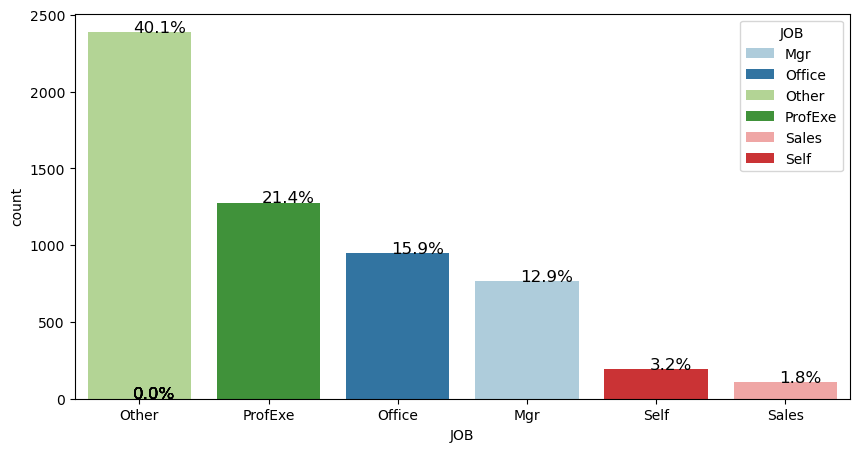

In [109]:
p = bar_perc(Loan,'JOB')

plt.show()

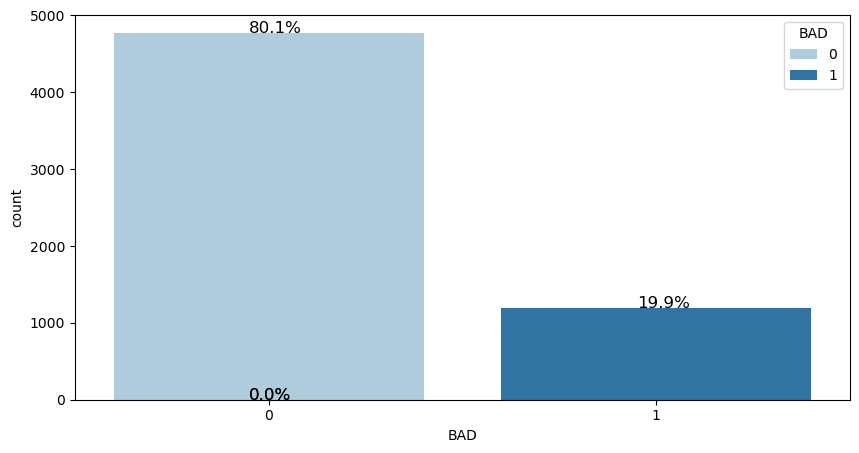

In [110]:
p = bar_perc(Loan,'BAD')
plt.show()

**Observation**

**JOB**:
- The largest group of clients (approximately 44.7%) falls into the **"Other"** job category, which likely includes a variety of roles not specified in other categories.  
- **"ProfExe"** (Professional/Executive) is the second most common category, representing around 21.4% of the clients.  
- **"Office"** roles account for about 15.8% of the clients.  
- **"Mgr"** (Manager), **"Self"** (Self-Employed), and **"Sales"** categories have smaller representations, with approximately 12.9%, 3.2%, and 1.8% of clients, respectively.  

**REASON**:
- A majority (approximately 69.8%) of clients have taken loans for **debt consolidation** (DebtCon), indicating it is the most common reason.  
- A smaller proportion (around 30.2%) have taken loans for **home improvement** purposes (HomeImp).  

**BAD**:
- About **20%** of the clients in the dataset are **loan defaulters** (BAD=1).  
- The remaining **80%** of the clients have successfully repaid their loans or are not defaulters (BAD=0).  



### **Bivariate Analysis**

In [113]:
## Check for correlation among numerical variables
corr=Loan[num_cols+['BAD']].corr()
corr

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,BAD
LOAN,1.000000,0.228595,0.335393,0.105728,-0.001302,-0.035144,0.088540,0.044487,0.072631,0.084735,-0.075099
MORTDUE,0.228595,1.000000,0.875666,-0.088480,-0.049516,-0.001044,0.140047,0.031392,0.323631,0.154939,-0.048219
VALUE,0.335393,0.875666,1.000000,0.007759,-0.048689,-0.014103,0.171238,-0.004398,0.269149,0.132174,-0.029954
YOJ,0.105728,-0.088480,0.007759,1.000000,-0.065879,0.038153,0.201718,-0.071627,0.024838,-0.055891,-0.060238
DEROG,-0.001302,-0.049516,-0.048689,-0.065879,1.000000,0.211832,-0.083047,0.173934,0.061884,0.017065,0.276081
DELINQ,-0.035144,-0.001044,-0.014103,0.038153,0.211832,1.000000,0.022488,0.067812,0.164639,0.052364,0.354107
CLAGE,0.088540,0.140047,0.171238,0.201718,-0.083047,0.022488,1.000000,-0.116935,0.237987,-0.046477,-0.170499
NINQ,0.044487,0.031392,-0.004398,-0.071627,0.173934,0.067812,-0.116935,1.000000,0.088389,0.141344,0.174980
CLNO,0.072631,0.323631,0.269149,0.024838,0.061884,0.164639,0.237987,0.088389,1.000000,0.185539,-0.004157
DEBTINC,0.084735,0.154939,0.132174,-0.055891,0.017065,0.052364,-0.046477,0.141344,0.185539,1.000000,0.199835


<Axes: >

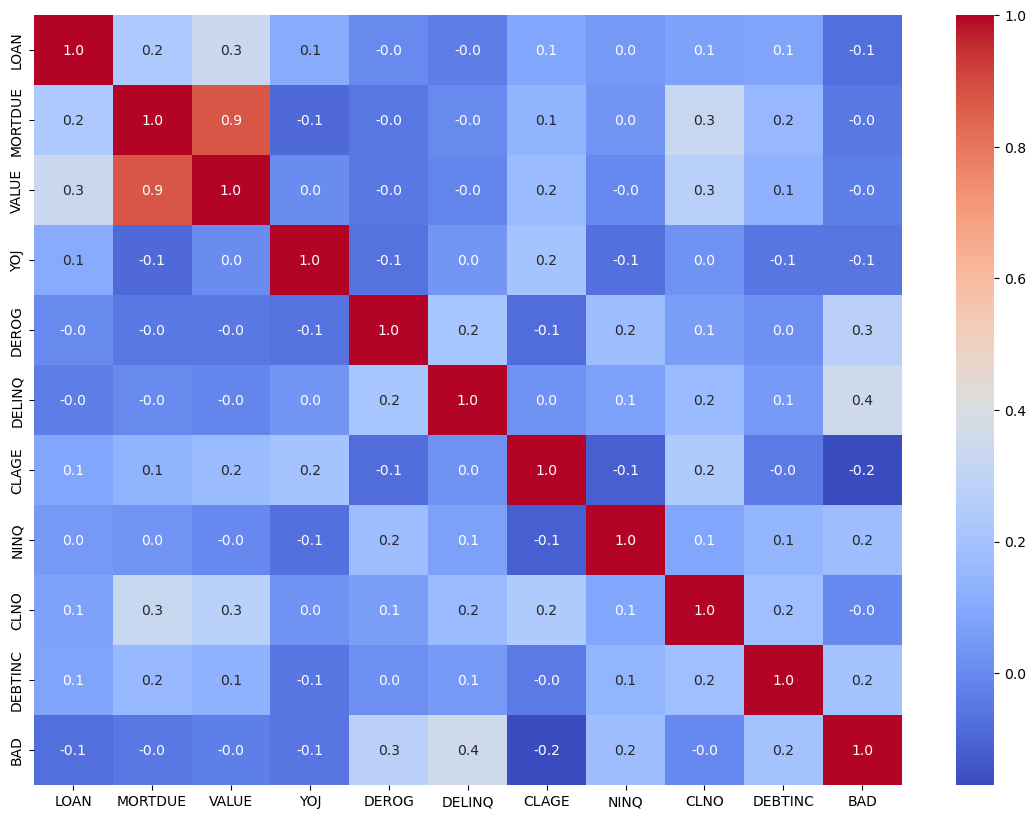

In [114]:

# Plot the mapp
plt.figure(figsize = (14, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = ".1f")

**Observations**:

- A strong correlation is observed between **VALUE** and **MORTDUE**, with a moderate correlation between these two variables and **CLNO**.  
- **LOAN** shows a moderate correlation with **VALUE** and **MORTDUE**.  
- There is a noticeable correlation between **DELINQ**, **DEROG**, and the target variable (**BAD**).  

### **Multivariate Analysis**

LOAN


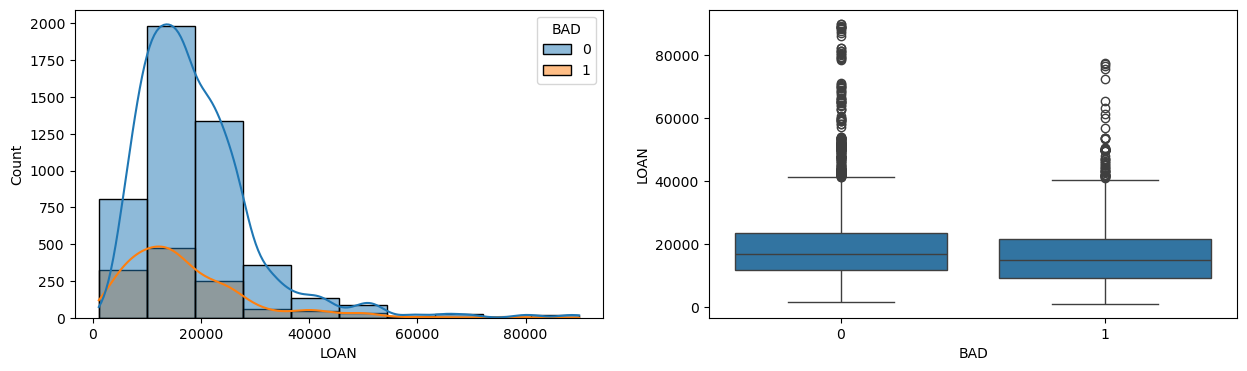

MORTDUE


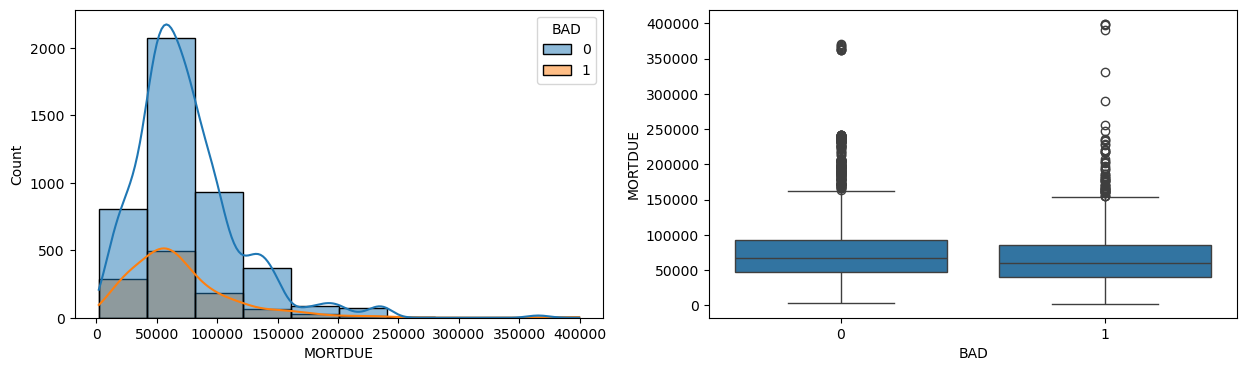

VALUE


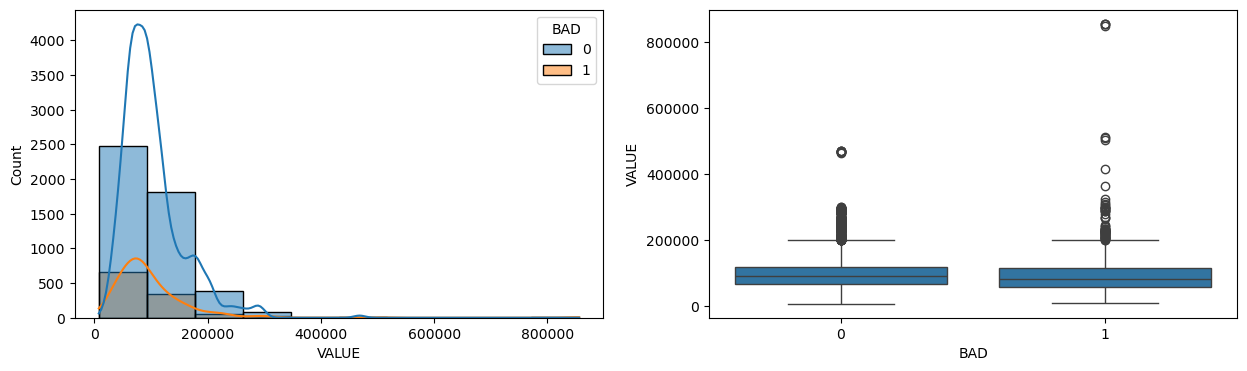

YOJ


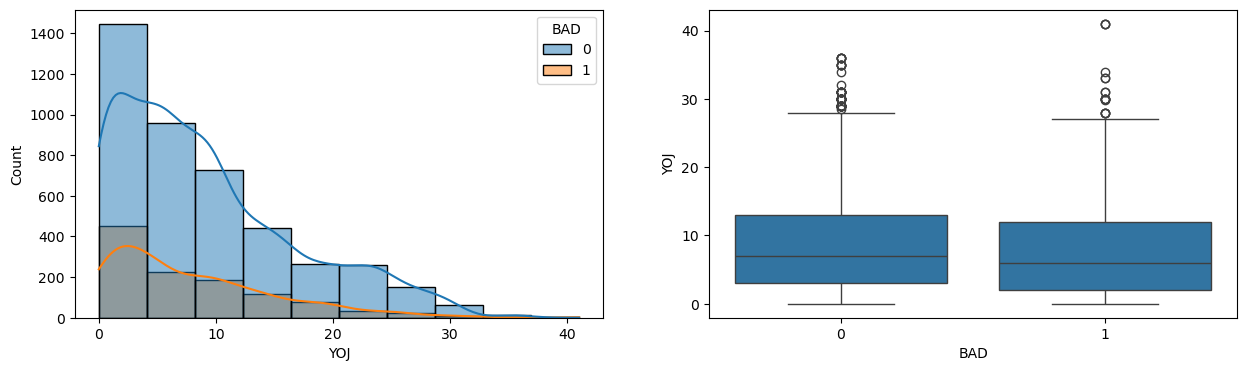

DEROG


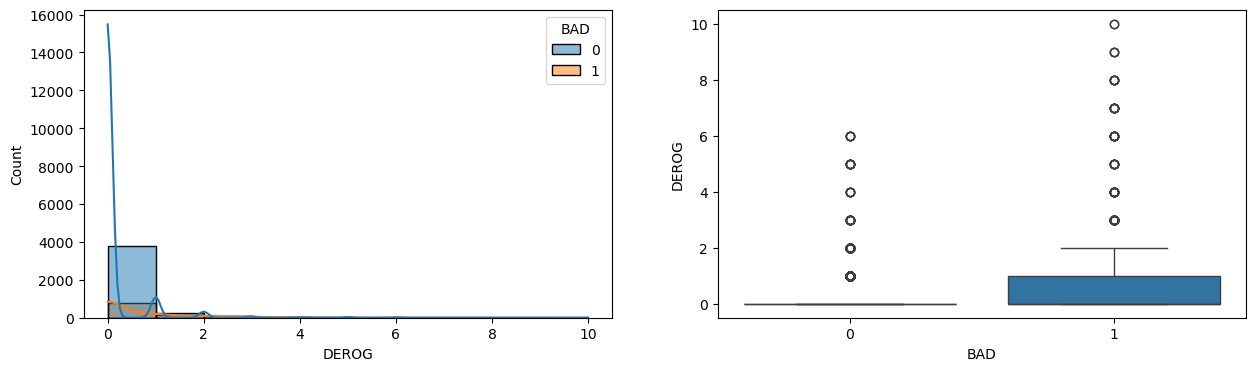

DELINQ


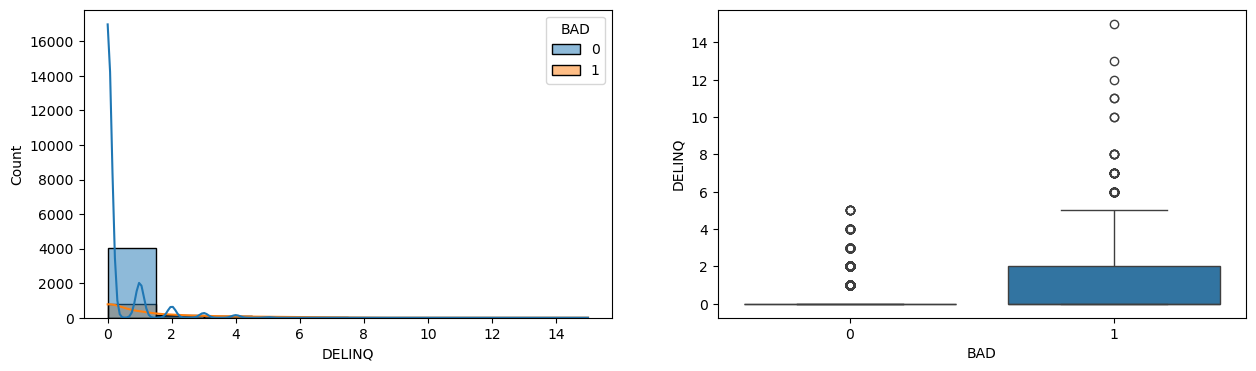

CLAGE


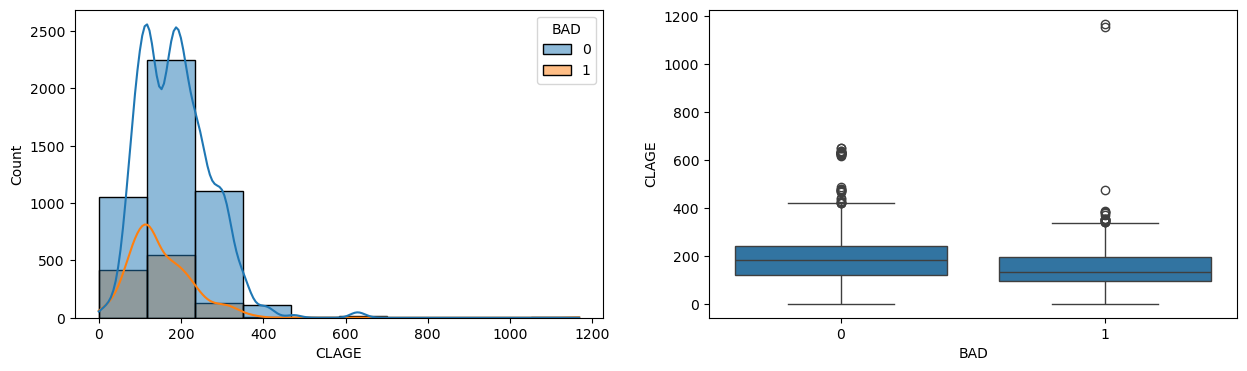

NINQ


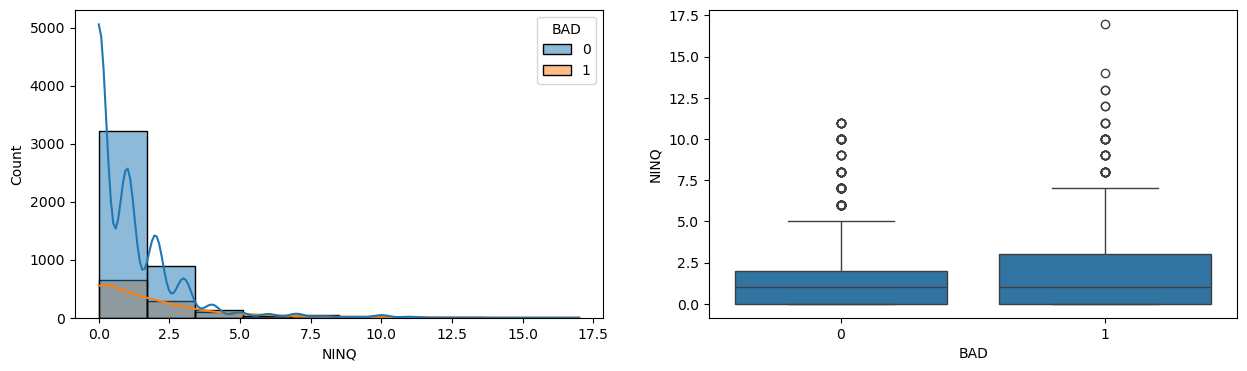

CLNO


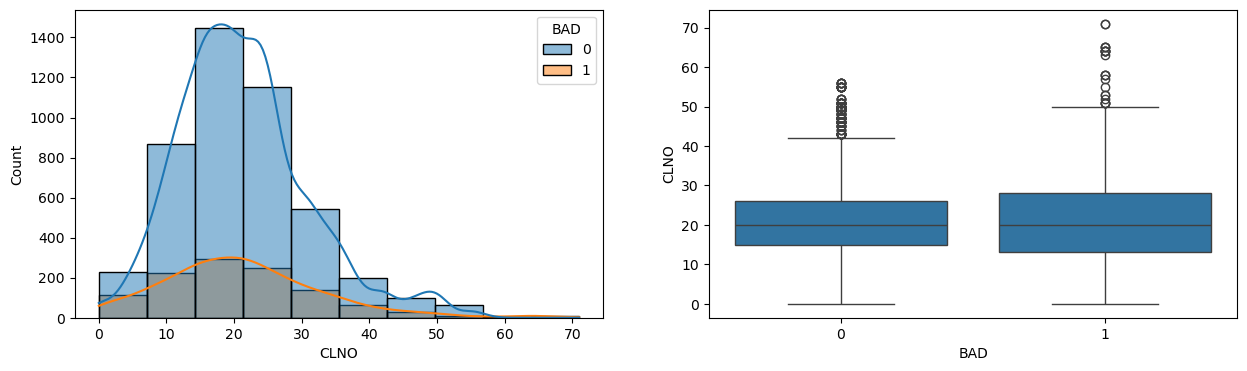

DEBTINC


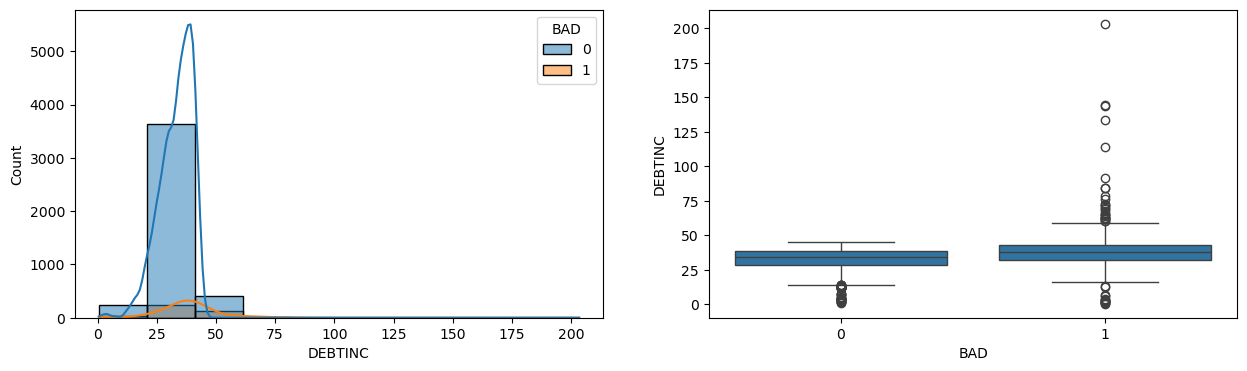

In [117]:
# Select a relevant subset of numerical columns
for col in num_cols:
    print(col)
    
    plt.figure(figsize = (15, 4))
    
    # Plot histogram as left subplot, with kde and hue by status
    plt.subplot(1, 2, 1)
    
    sns.histplot(data=Loan, x=col, bins = 10, hue=Loan['BAD'], kde=True)
    
    # Plot boxplot as right subplot, with hue by status
    plt.subplot(1, 2, 2)
    
    sns.boxplot(data=Loan, y=col, x='BAD')
    
    plt.show()

**Observation**
- Based on the **Loan** plot, it appears that the higher the loan amount, the lower the likelihood of default. However, for loan amounts up to a certain threshold (80,000), the chances of default and non-default seem comparable.
- The **Mortude** plot suggests that as the mortgage due increases, the likelihood of default also rises. However, for amounts up to a certain threshold (250,000), the chances of default and non-default appear to be similar.
- Based on the **Value** plot, it seems higher the loan VALUE, higher the chances of default.
- The **YOJ**plot suggests that YOJ (years on the job) does not appear to be a significant determining factor.
- Based on the **DEROG** plot, it seems higher the derogatory remarks, higher the chances of default.
- The **DELINQ** plot indicates that an increase in delinquencies is associated with a higher likelihood of default.
- The **CLAGE** plot suggests that as CLAGE increases, the likelihood of default decreases. However, there are a few exceptions to this trend.
- The **NINQ** plot indicates that as NINQ increases, the likelihood of default also rises.
- The **CLNO** plot suggests that as CLNO increases, the likelihood of default rises.
- The **DEBTING** plot indicates that as DEBTINC increases, the likelihood of default also increases.
- Likewise, the correlation analysis, along with the histogram and box plot, reveals that the features **DEBTING** , **DEROG** and **DELINQ** exhibit a significant association with the probability of clients defaulting or experiencing severe delinquency.

In [119]:

# Loop through the columns and create countplots, assigning each to an axis
for col in num_cols:
    x = Loan.groupby(['BAD'])[col].median()
    y = Loan.groupby(['BAD'])[col].mean()

    print('median:',x)
    print('\nmean:',y)
    print('-'*50)

median: BAD
0    16900.0
1    14900.0
Name: LOAN, dtype: float64

mean: BAD
0    19028.107315
1    16922.119428
Name: LOAN, dtype: float64
--------------------------------------------------
median: BAD
0    66839.0
1    60279.0
Name: MORTDUE, dtype: float64

mean: BAD
0    74829.249055
1    69460.452973
Name: MORTDUE, dtype: float64
--------------------------------------------------
median: BAD
0    90659.0
1    82000.0
Name: VALUE, dtype: float64

mean: BAD
0    102595.921018
1     98172.846227
Name: VALUE, dtype: float64
--------------------------------------------------
median: BAD
0    7.0
1    6.0
Name: YOJ, dtype: float64

mean: BAD
0    9.154941
1    8.027802
Name: YOJ, dtype: float64
--------------------------------------------------
median: BAD
0    0.0
1    0.0
Name: DEROG, dtype: float64

mean: BAD
0    0.134217
1    0.707804
Name: DEROG, dtype: float64
--------------------------------------------------
median: BAD
0    0.0
1    0.0
Name: DELINQ, dtype: float64

mean: BAD
0 

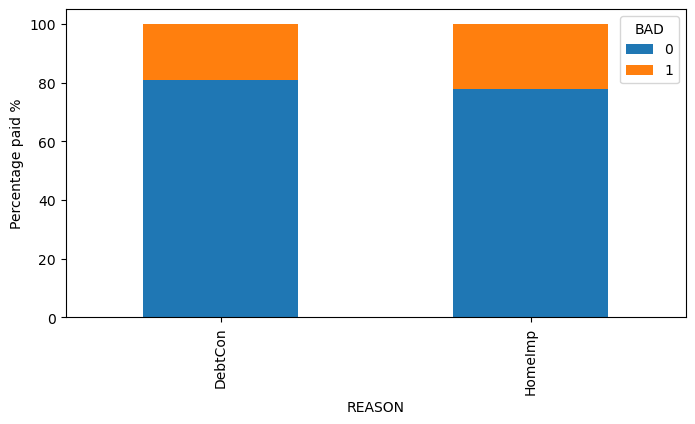

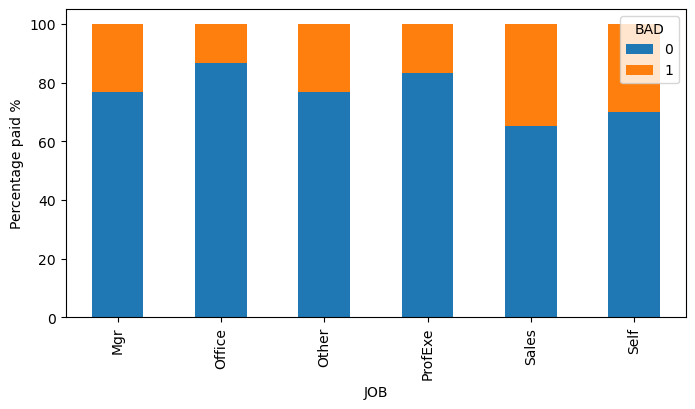

In [120]:
for i in cat_cols:
    if i != 'BAD':
        (pd.crosstab(Loan[i], Loan['BAD'], normalize = 'index')*100).plot(kind = 'bar', figsize = (8, 4), stacked = True)
        plt.ylabel('Percentage paid %')

In [121]:
for col in [c for c in cat_cols if c != 'BAD']:
    print(f"Group by '{col}' and value counts for 'status':")
    print(Loan.groupby([col])['BAD'].value_counts(normalize = True))
    print('-' * 50)
    

Group by 'REASON' and value counts for 'status':
REASON   BAD
DebtCon  0      0.810336
         1      0.189664
HomeImp  0      0.777528
         1      0.222472
Name: proportion, dtype: float64
--------------------------------------------------
Group by 'JOB' and value counts for 'status':
JOB      BAD
Mgr      0      0.766623
         1      0.233377
Office   0      0.868143
         1      0.131857
Other    0      0.768007
         1      0.231993
ProfExe  0      0.833856
         1      0.166144
Sales    0      0.651376
         1      0.348624
Self     0      0.699482
         1      0.300518
Name: proportion, dtype: float64
--------------------------------------------------


Text(0, 0.5, 'Percentage paid %')

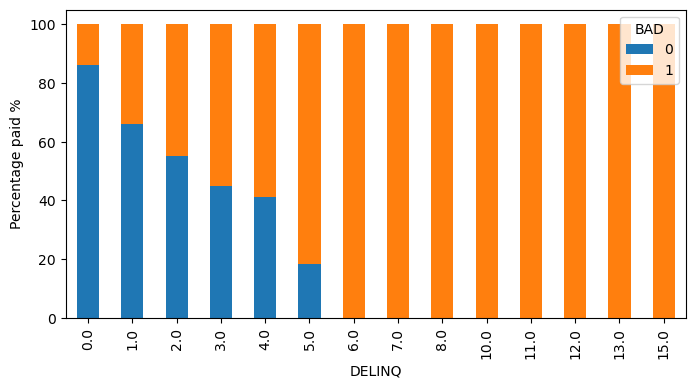

In [122]:
(pd.crosstab(Loan['DELINQ'], Loan['BAD'], normalize = 'index')*100).plot(kind = 'bar', figsize = (8, 4), stacked = True) 
plt.ylabel('Percentage paid %')

Text(0, 0.5, 'Percentage paid %')

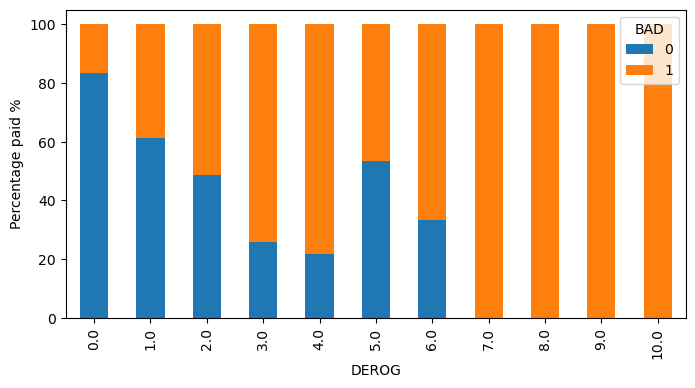

In [123]:
(pd.crosstab(Loan['DEROG'], Loan['BAD'], normalize = 'index')*100).plot(kind = 'bar', figsize = (8, 4), stacked = True) 
plt.ylabel('Percentage paid %')

**Observation**
- People who want a loan to home repairs  are 4% more likely to exhibit a significant association with the probability of clients defaulting or experiencing severe delinquency than People who want a loan for pay off debt .
- The occupations most commonly associated with individuals defaulting or experiencing severe delinquency, ranked from highest to lowest, are: Sales, Self-employed, Manager, Other, and Professional/Executive.
- For the features **DELINQ and DEROG**, handling outliers could result in losing important customer information related to delinquency and default. To avoid this, it might be better to **keep the outlier data for these two features**.

## Treating Outliers

- Number of outliers due to two different methods, zscore and IQR

In [127]:
for variable in num_cols:
    print(variable)
    Q1=Loan[variable].quantile(0.25)
    Q3=Loan[variable].quantile(0.75)
    IQR=Q3-Q1
    Zscore=np.abs(stats.zscore(Loan[variable]))
    #z_scores = np.abs(zscore(df[column], nan_policy='omit'))

    print('number of outliers with IQR=',Loan[(Loan[variable]<Q1-1.5*IQR)|(Loan[variable]>Q3+1.5*IQR)].shape[0])
    print('number of outliers with zscore=',Loan[Zscore>3].shape[0])
    

LOAN
number of outliers with IQR= 256
number of outliers with zscore= 95
MORTDUE
number of outliers with IQR= 234
number of outliers with zscore= 0
VALUE
number of outliers with IQR= 320
number of outliers with zscore= 0
YOJ
number of outliers with IQR= 91
number of outliers with zscore= 0
DEROG
number of outliers with IQR= 725
number of outliers with zscore= 0
DELINQ
number of outliers with IQR= 1201
number of outliers with zscore= 0
CLAGE
number of outliers with IQR= 47
number of outliers with zscore= 0
NINQ
number of outliers with IQR= 177
number of outliers with zscore= 0
CLNO
number of outliers with IQR= 219
number of outliers with zscore= 0
DEBTINC
number of outliers with IQR= 94
number of outliers with zscore= 0


**Outlier Treatment Function Definitions**:
- none: Maintain the data in its current state.
- null: Replace outliers identified by both IQR and Z-score methods with null values.
- mean: Impute outliers with the mean value of the corresponding feature.
- median: Impute outliers with the median value of the corresponding feature.
- mode: Impute outliers with the mode value of the corresponding feature.
- lu: Replace outliers detected by the Z-score method with null values and the remaining outliers with their respective upper or lower whisker values. columns 

- In this dataset For
'LOAN',
 'MORTDUE',for
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC features the  'null', 'null', 'null', 'null', 'none', 'none', 'mean', 'lu', 'lu', 'null' methods were used respectively.

In [129]:
from scipy import stats
import numpy as np
import pandas as pd

def treat_outliers(df, handleOutlierType, col):
    """
    Function to treat outliers in a specific column based on the defined handling type.
    Arguments:
        df: DataFrame containing the data
        handleOutlierType: DataFrame mapping column names to outlier handling methods
        col: Name of the column to process
    Returns:
        Updated DataFrame with treated outliers in the specific column.
    """
    # Calculate IQR
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1  # Interquartile Range
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    
    # Calculate z-scores for the column
    z_scores = np.abs(stats.zscore(df[col], nan_policy='omit'))

    # Get outlier handling type for the column
    typeManage = handleOutlierType.loc[handleOutlierType['col'] == col, 'type'].values[0]

    if typeManage == 'null':
        # Set outliers to NaN
        df[col] = df[col].apply(lambda x: np.nan if (x < lower_whisker or x > upper_whisker) else x)
    elif typeManage in ['mean', 'median', 'mode']:
        # Replace outliers with specified aggregate value
        if typeManage == 'mean':
            rep_value = df[col].mean()
        elif typeManage == 'median':
            rep_value = df[col].median()
        elif typeManage == 'mode':
            rep_value = df[col].mode()[0]
        # Apply replacement
        df[col] = df[col].apply(lambda x: rep_value if (x < lower_whisker or x > upper_whisker) else x)
    elif typeManage == 'lu':
        # Identify outliers based on z-scores > 3
        z_outliers = z_scores > 3
        # Set values with z-scores > 3 to NaN
        df[col] = df[col].where(~z_outliers, np.nan)
        # Clip remaining values to whisker boundaries
        df[col] = np.clip(df[col], lower_whisker, upper_whisker)
    elif typeManage == 'none':
        # Do nothing if 'none' is specified
        pass
    else:
        raise ValueError(f"Unknown handling type: {typeManage}")

    return df


# Example usage
handleOutlierType = pd.DataFrame({
    'col': num_cols,
    'type': ['null', 'null', 'null', 'null', 'none', 'none', 'mean', 'lu', 'lu', 'null']
})

# Apply the function to numeric columns
for col in num_cols:
    df = treat_outliers(Loan, handleOutlierType, col)


**Observation**

For the  Home Equity dataset, the following outlier treatment methods were applied to the specified features:
- 'LOAN':null
'MORTDUE': null
'VALUE': null
'YOJ': null
'DEROG': none
'DELINQ': none
'CLAGE': mean
'NINQ': lu
'CLNO': lu
'DEBTINC': null

Feature: i
Skew : 0.6


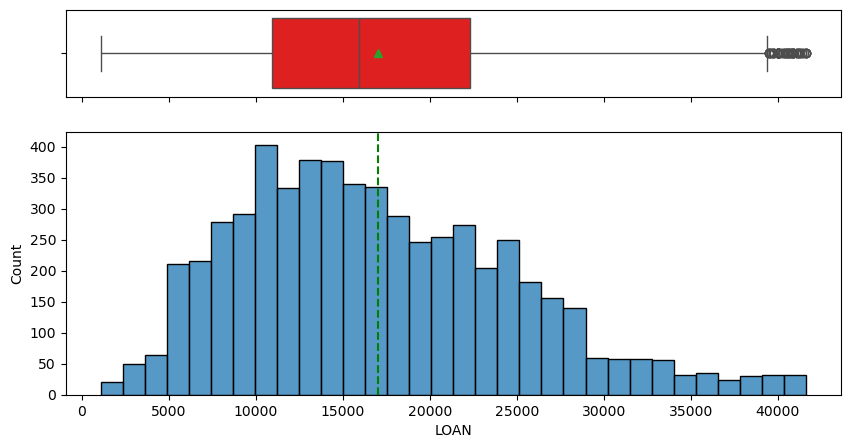

Feature: i
Skew : 0.51


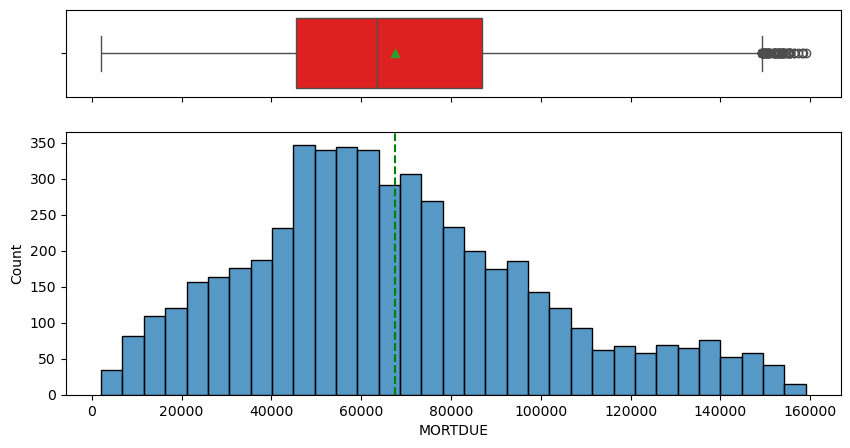

Feature: i
Skew : 0.7


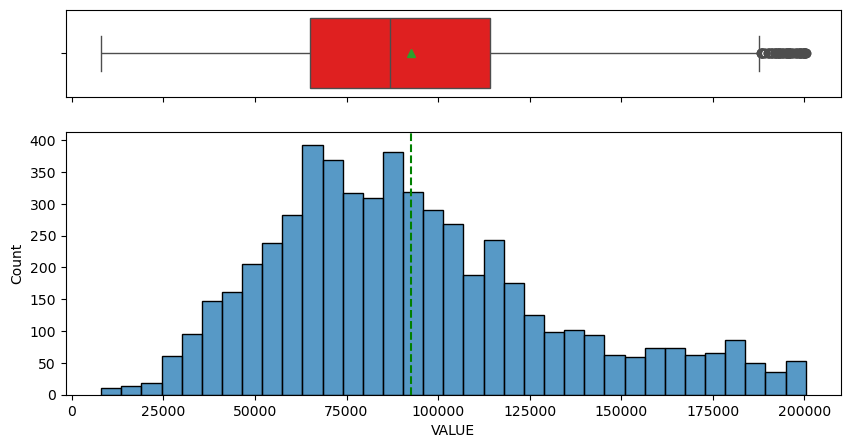

Feature: i
Skew : 0.86


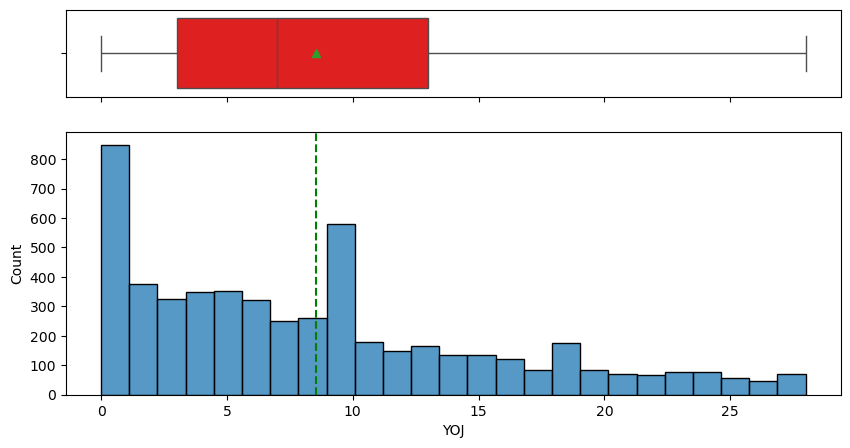

Feature: i
Skew : 5.32


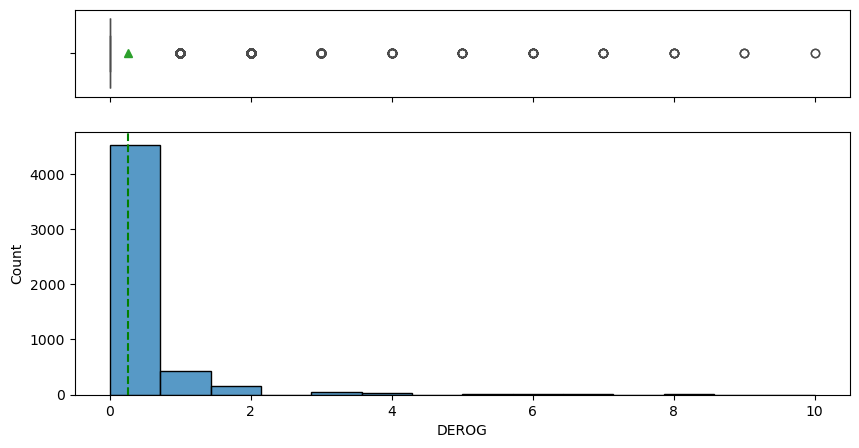

Feature: i
Skew : 4.02


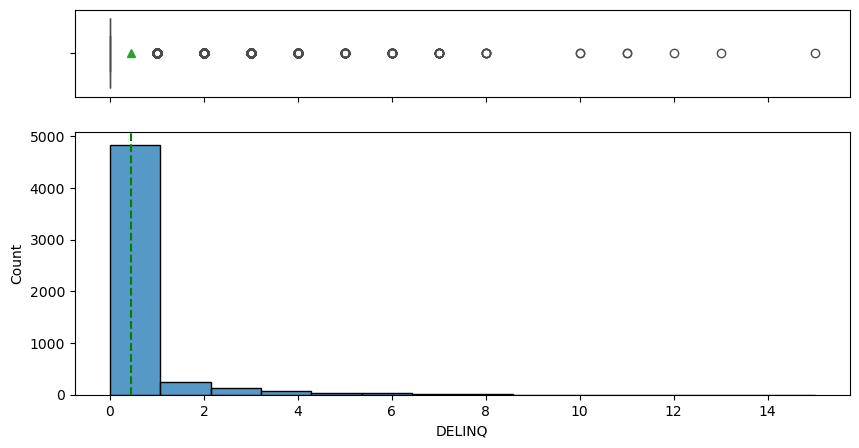

Feature: i
Skew : 0.41


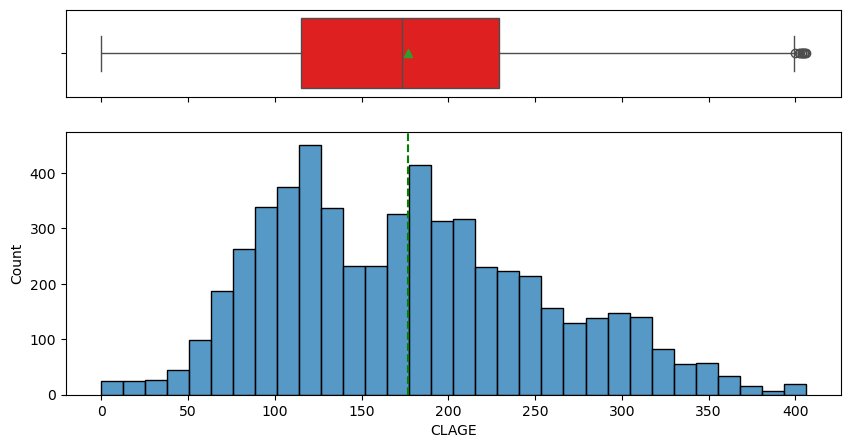

Feature: i
Skew : 1.32


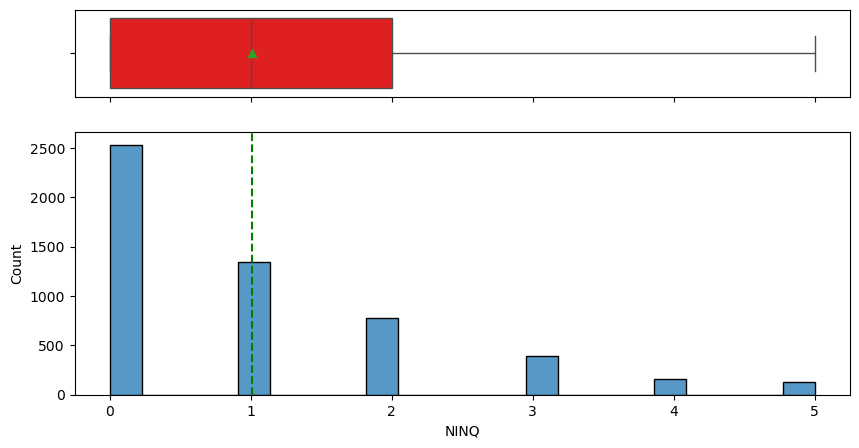

Feature: i
Skew : 0.34


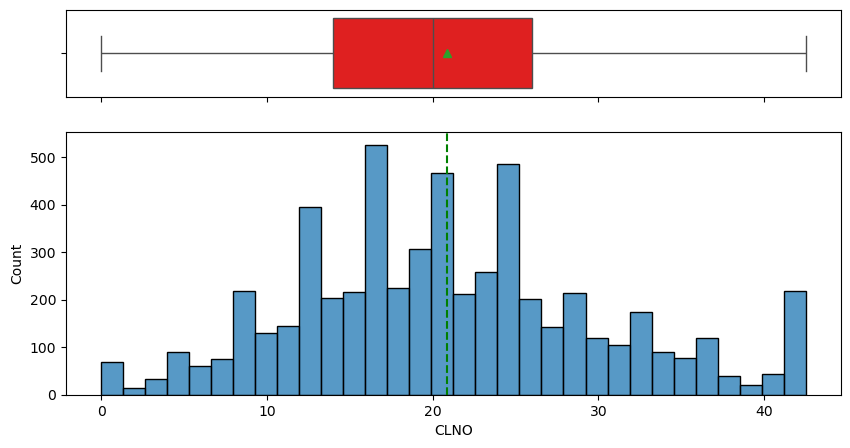

Feature: i
Skew : -0.53


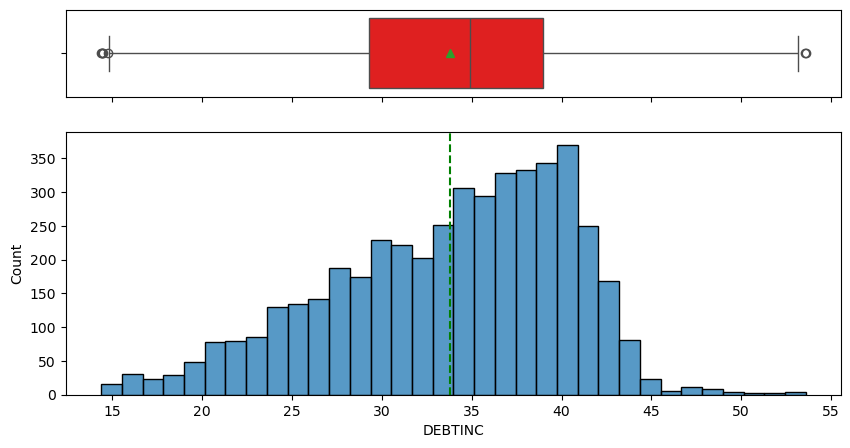

In [131]:
for i in num_cols:
    p = histogram_boxplot(df[i],'i')
    plt.show()

**Observation**:
 **The effectiveness of outlier treatment was assessed by examining boxplots and histograms**.

- For the 'lu' method: The upper whisker of the boxplot exhibited an increased count of data points after outlier treatment was applied.
- For the 'none' method: The plots remained unchanged, as expected, since no outlier treatment was performed.
- For the 'null' method: Outliers were no longer visible in the plots, indicating successful removal.
- For the 'median', 'mode', and 'mean' methods: Histograms revealed a higher frequency of data points at the values corresponding to the respective treatment (median, mode, or mean).

## Treating Missing Values

The total number of missing values after outlier treatment should equal the sum of the initial number of missing values and the number of outliers that were replaced with null values.

In [135]:
def detect_missing_percent(dt):
        S=dt.isnull().sum()
        P=S/len(dt) * 100
        missing_data_df = pd.DataFrame({
            'Sum of Missing': S,
            'Percentage of Missing (%)': P
        })
        print(missing_data_df)

detect_missing_percent(df)

         Sum of Missing  Percentage of Missing (%)
BAD                   0                   0.000000
LOAN                256                   4.295302
MORTDUE             752                  12.617450
VALUE               432                   7.248322
REASON              252                   4.228188
JOB                 279                   4.681208
YOJ                 606                  10.167785
DEROG               708                  11.879195
DELINQ              580                   9.731544
CLAGE               308                   5.167785
NINQ                631                  10.587248
CLNO                264                   4.429530
DEBTINC            1361                  22.835570


**Observation**  
- The missing values in **Loan**, **Reason**, **JOB**, **CLAGE**, and **CLNO** are below 6%. These can be imputed using the mean, mode, or median depending on whether the feature is numerical or categorical.  
- The feature **MORTDUE** shows a high correlation with feature **Loan**. As it does not provide additional information and could lead to overfitting, it is removed from the dataset.  
- For the features **VALUE**, **YOJ**, **DEROG**, **DELINQ**, **NINQ**, and **DEBTINC**, further investigation is required to determine the appropriate method for handling their missing values.

**Method**:
- The value of numerical columns associated with categorical features is determined to analyze the range of numerical values within each category. This information is used to guide the handling of null values within these value range.

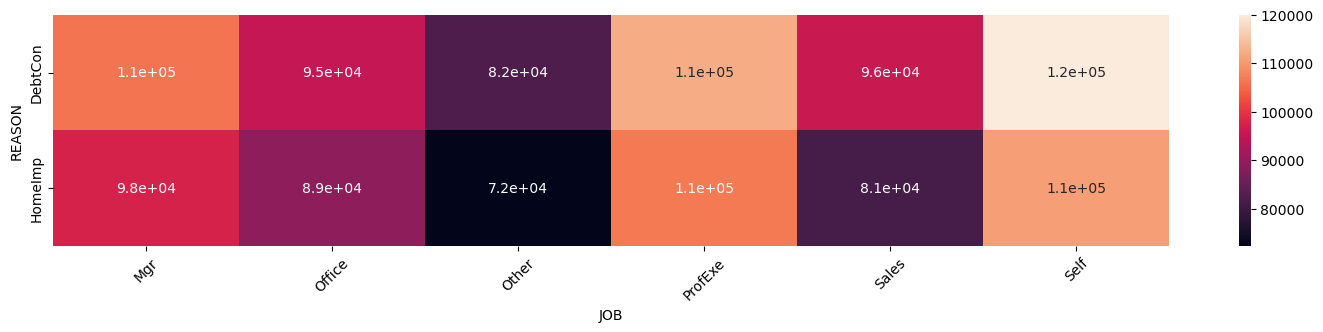

In [138]:
fig = plt.figure(figsize = (18, 3))

sns.heatmap(Loan.pivot_table(index = 'REASON', columns = 'JOB', values = 'VALUE'), annot = True);

plt.xticks(rotation = 45);

In [139]:
VALUE_indices_to_be_updated = df[df['VALUE'].isnull()].index

df.loc[VALUE_indices_to_be_updated, 'VALUE'] = np.random.uniform(72000, 120000,len(VALUE_indices_to_be_updated))

**Observation**
- Based on the insights from the upper heatmap, null values in the 'VALUE' feature are imputed using a uniform distribution within the range of 72,000 to 120,000.

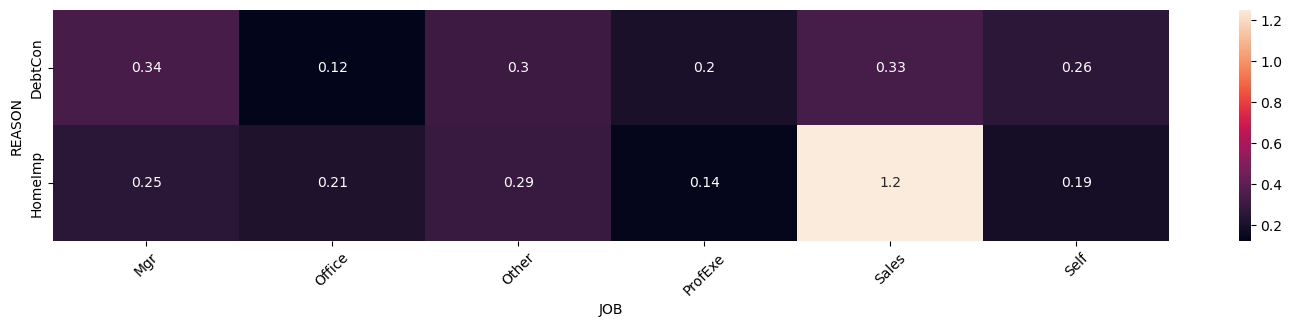

In [141]:
fig = plt.figure(figsize = (18, 3))

sns.heatmap(Loan.pivot_table(index = 'REASON', columns = 'JOB', values = 'DEROG'), annot = True);

plt.xticks(rotation = 45);

In [142]:
DEROG_indices_to_be_updated = df[df['DEROG'].isnull()].index

df.loc[DEROG_indices_to_be_updated, 'DEROG'] = np.random.uniform(0.12, 1.2,len(DEROG_indices_to_be_updated))

- Based on the insights from the upper heatmap, null values in the 'DEROG' feature are imputed using a uniform distribution within the range of 0.12 to 1.2.

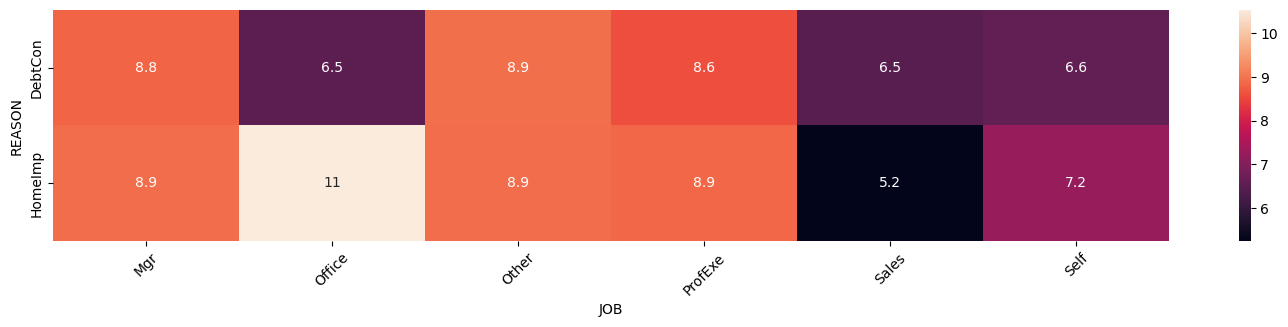

In [144]:
fig = plt.figure(figsize = (18, 3))

sns.heatmap(Loan.pivot_table(index = 'REASON', columns = 'JOB', values = 'YOJ'), annot = True);

plt.xticks(rotation = 45);

In [145]:
YOJ_indices_to_be_updated = df[df['YOJ'].isnull()].index

df.loc[YOJ_indices_to_be_updated, 'YOJ'] = np.random.uniform(5.2, 11,len(YOJ_indices_to_be_updated))

- Based on the insights from the upper heatmap, null values in the 'YOJ' feature are imputed using a uniform distribution within the range of 5.2 to 11.

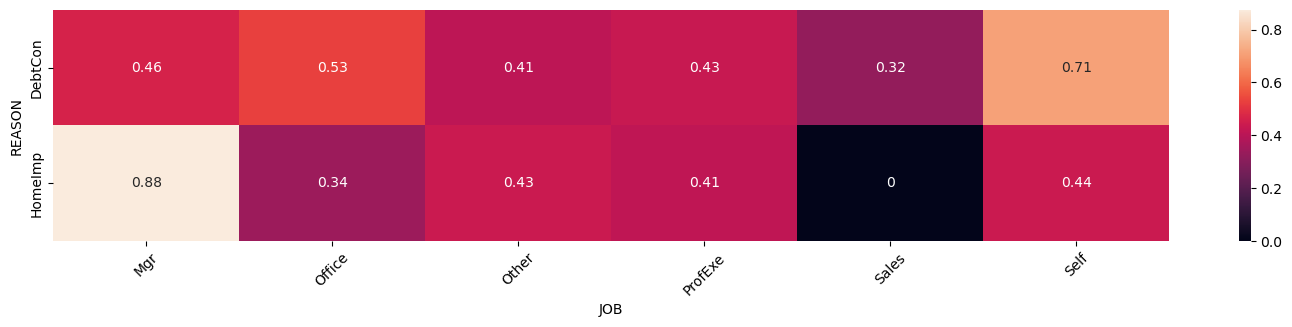

In [147]:
fig = plt.figure(figsize = (18, 3))

sns.heatmap(Loan.pivot_table(index = 'REASON', columns = 'JOB', values = 'DELINQ'), annot = True);

plt.xticks(rotation = 45);

In [148]:
DELINQ_indices_to_be_updated = df[df['DELINQ'].isnull()].index

df.loc[DELINQ_indices_to_be_updated, 'DELINQ'] = np.random.uniform(0, 0.88,len(DELINQ_indices_to_be_updated))

- Based on the insights from the upper heatmap, null values in the 'DELINQ' feature are imputed using a uniform distribution within the range of 0 to 0.88.

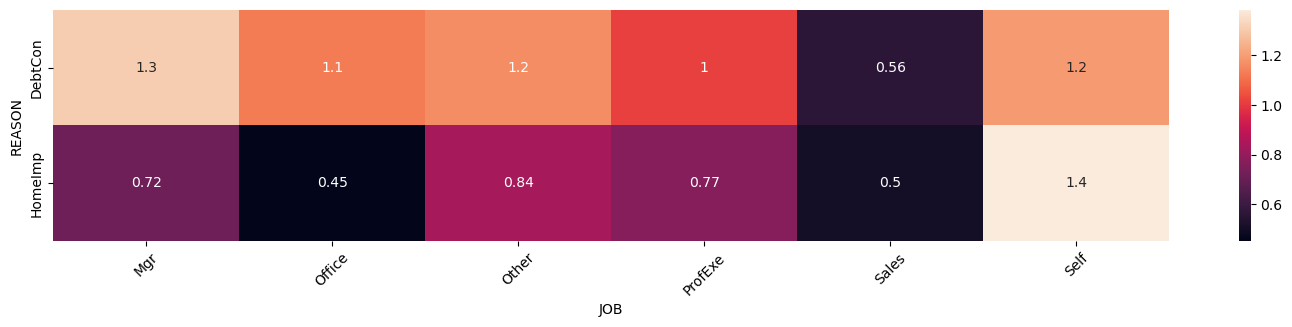

In [150]:
fig = plt.figure(figsize = (18, 3))

sns.heatmap(Loan.pivot_table(index = 'REASON', columns = 'JOB', values = 'NINQ'), annot = True);

plt.xticks(rotation = 45);

In [151]:
NINQ_indices_to_be_updated = df[df['NINQ'].isnull()].index

df.loc[NINQ_indices_to_be_updated, 'NINQ'] = np.random.uniform(0.45, 1.4,len(NINQ_indices_to_be_updated))

- Based on the insights from the upper heatmap, null values in the 'NINQ' feature are imputed using a uniform distribution within the range of 0.45 to 1.4.

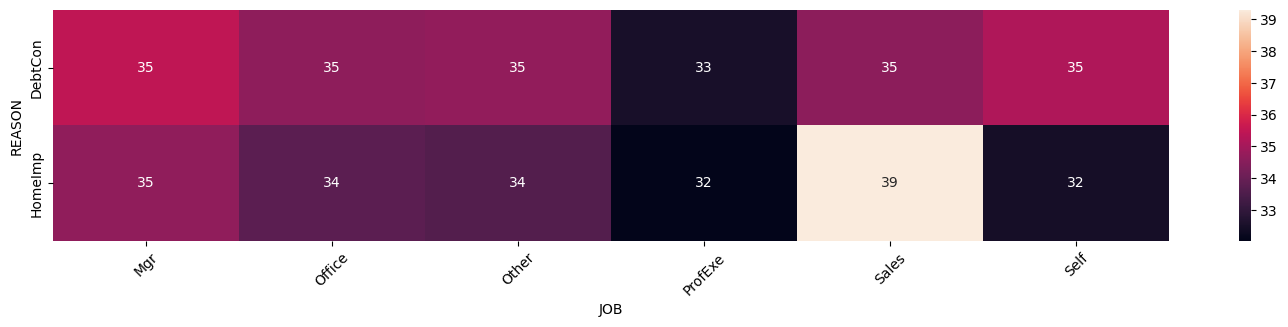

In [153]:
fig = plt.figure(figsize = (18, 3))

sns.heatmap(Loan.pivot_table(index = 'REASON', columns = 'JOB', values = 'DEBTINC'), annot = True);

plt.xticks(rotation = 45);

In [154]:
DEBTINC_indices_to_be_updated = df[df['DEBTINC'].isnull()].index

df.loc[DEBTINC_indices_to_be_updated, 'DEBTINC'] = np.random.uniform(32, 39,len(DEBTINC_indices_to_be_updated))

- Based on the insights from the upper heatmap, null values in the 'DEBTINC' feature are imputed using a uniform distribution within the range of 32 to 39.

**Observation**
- Outlier treatment methods were applied to features VALUE, YOJ, DEROG, DELINQ, NINQ, and DEBTINC, which exhibited more than 6% missing values. All null values within these features have been replaced with zero."

In [157]:
def detect_missing_percent(dt):
        S=dt.isnull().sum()
        P=S/len(dt) * 100
        missing_data_df = pd.DataFrame({
            'Sum of Missing': S,
            'Percentage of Missing (%)': P
        })
        print(missing_data_df)

detect_missing_percent(df)

         Sum of Missing  Percentage of Missing (%)
BAD                   0                   0.000000
LOAN                256                   4.295302
MORTDUE             752                  12.617450
VALUE                 0                   0.000000
REASON              252                   4.228188
JOB                 279                   4.681208
YOJ                   0                   0.000000
DEROG                 0                   0.000000
DELINQ                0                   0.000000
CLAGE               308                   5.167785
NINQ                  0                   0.000000
CLNO                264                   4.429530
DEBTINC               0                   0.000000


**For the remaining missing values, the following imputation strategies were employed**:

- Categorical Features (REASON and JOB): Missing values were replaced with the mode (most frequent value).
- 'LOAN' and 'CLAGE' Features: Missing values were replaced with the mean value of the respective feature.
- 'MORTDUE' Feature: This feature was removed due to high correlation with the 'VALUE' feature.
- 'VALUE' Feature: Missing values were imputed using the k-Nearest Neighbors (kNN) method.
- 'CLNO' Feature: Missing values were replaced with the median value of the feature.

In [159]:
handleMissingType={'col':df.columns,
         'type':['none', 'mean', 'del', 'knn', 'mode', 'mode', 'none', 'none', 'none', 'mean','none', 'median', 'none']}

handleMissingType=pd.DataFrame(handleMissingType)
handleMissingType  

,col,type
0,BAD,none
1,LOAN,mean
2,MORTDUE,del
3,VALUE,knn
4,REASON,mode
5,JOB,mode
6,YOJ,none
7,DEROG,none
8,DELINQ,none
9,CLAGE,mean


In [160]:
def manage_missing(df):
    for i in df.columns:
        typeManage=handleMissingType.loc[handleMissingType['col'] == i, 'type'].values[0]         
        
        if  typeManage=='mode':
             df[i]=df[i].fillna(df[i].mode()[0])
        elif typeManage=='mean':
             df[i]=df[i].fillna(df[i].mean())
        elif typeManage=='median':
             df[i]=df[i].fillna(df[i].median())
        elif typeManage=='del':
             del df[i]
        else:
            imputer = KNNImputer(n_neighbors=10)
            df[i] = imputer.fit_transform(df[[i]])
            
            
manage_missing(df) 

In [161]:
def detect_missing_percent(dt):
        S=dt.isnull().sum()
        P=S/len(dt) * 100
        missing_data_df = pd.DataFrame({
            'Sum of Missing': S,
            'Percentage of Missing (%)': P
        })
        print(missing_data_df)

detect_missing_percent(df)

         Sum of Missing  Percentage of Missing (%)
BAD                   0                        0.0
LOAN                  0                        0.0
VALUE                 0                        0.0
REASON                0                        0.0
JOB                   0                        0.0
YOJ                   0                        0.0
DEROG                 0                        0.0
DELINQ                0                        0.0
CLAGE                 0                        0.0
NINQ                  0                        0.0
CLNO                  0                        0.0
DEBTINC               0                        0.0


**The dataset is now free of missing values**.

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?


1. **Loan Amounts and Mortgage Balances:**
   - Loan amounts range from `$`1,100 to `$`89,900, averaging `$`18,608, with `$`15,000 being the most common value.
   - Mortgage balances range from `$`2,063 to `$`399,550, averaging `$`73,761, with `$`42,000 as the most frequent value.

2. **Property Values and Debt-to-Income Ratios:**
   - Property values span`$`8,000 to `$`855,909, averaging `$`101,776, with `$`42,000 as the most common value.
   - Debt-to-income ratios range from 0.52 to 203.31, with an average of 33.78, and 16 being the most frequent.

3. **Employment and Loan Reasons:**
   - The largest job category is "Other" (44.7%), followed by "ProfExe" (21.4%) and "Office" (15.8%). Smaller groups include "Mgr" (12.9%), "Self" (3.2%), and "Sales" (1.8%).
   - Most loans (69.8%) are for debt consolidation, while 30.2% are for home improvements.

4. **Default Rates and Credit Characteristics:**
   - Around 20% of clients are loan defaulters (BAD=1), while 80% successfully repay or do not default (BAD=0).
   - A significant relationship exists between loan defaults and the number of delinquent credit lines (DELINQ) and derogatory reports (DEROG).

5. **Work Experience and Credit Lines:**
   - Clients' work experience ranges from 0 to 41 years, averaging 8.9 years, with 0 years being the most common.
   - The number of existing credit lines ranges from 0 to 71, with an average of 21.3, and 16 being the most frequent.

6. **Key Correlations:**
   - A strong correlation is seen between property value (VALUE) and mortgage balance (MORTDUE), with a moderate correlation to the number of credit lines (CLNO) and loan amounts (LOAN).
   - Default rates (BAD) are moderately correlated with delinquent credit lines (DELINQ) and derogatory reports (DEROG).

7. **Loan Purpose and Default Likelihood:**
   - Clients borrowing for home improvement are 4% more likely to default than those borrowing for debt consolidation.

8. **Occupation and Default Likelihood:**
   - Defaulting occupations ranked from highest to lowest likelihood: Sales, Self-employed, Manager, Other, and Professional/Executive.

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

###  **Preparing data for modeling**

**Creating dummy variables for categorical Variables**

In [168]:

# Creating the list of columns for which we need to create the dummy variables
to_get_dummies_for = ['REASON','JOB']
# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)      

# Mapping overtime and attrition
dict_OverTime = {'Yes': 1, 'No': 0}
dict_attrition = {'Yes': 1, 'No': 0}

**Separating the independent variables (X) and the dependent variable (Y)**

In [170]:
# Separating the target variable and other variables
Y = df.BAD
X = df.drop(columns = ['BAD'])

**Splitting the data into 70% train and 30% test sets**

In [172]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

**Scaling**

In [174]:
# Scaling the data
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

### **Model evaluation criterion**

**The model can make two types of wrong predictions:**
1. Incorrectly predicting that an applicant will default or become severely delinquent when, in reality, they do not.
2. Failing to predict that an applicant will default or become severely delinquent when, in fact, they do.
   
**Which case is more important?**

* **Failing to predict that an applicant will default or become severely delinquent when, in fact, they do.**, In other words, the bank extends a loan to an individual who is unable to repay it.
  
**How to reduce this loss? i.e the need to reduce False Negatives**
* **The bank would want the Recall to be maximized**, the greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing the Recall (minimizing the false negatives) or, in other words, identifying the true positives very well.

let's create a function to calculate and print the classification report and the confusion matrix so that we don't have to rewrite the same code repeatedly for each model.

In [177]:
def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not BAD', 'BAD'], yticklabels = ['Not BAD', 'BAD'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')
    
    plt.show()

In [178]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

### Logistic Regression

In [180]:
# Fitting the logistic regression model
lg = LogisticRegression()

lg.fit(x_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      3340
         1.0       0.68      0.20      0.31       832

    accuracy                           0.82      4172
   macro avg       0.76      0.59      0.60      4172
weighted avg       0.80      0.82      0.78      4172



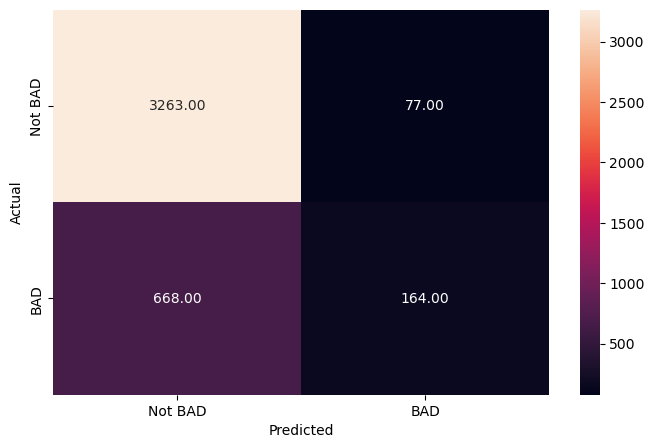

In [181]:
# Checking the performance on the training data
y_pred_train = lg.predict(x_train)

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90      1431
         1.0       0.65      0.18      0.29       357

    accuracy                           0.82      1788
   macro avg       0.74      0.58      0.59      1788
weighted avg       0.79      0.82      0.77      1788



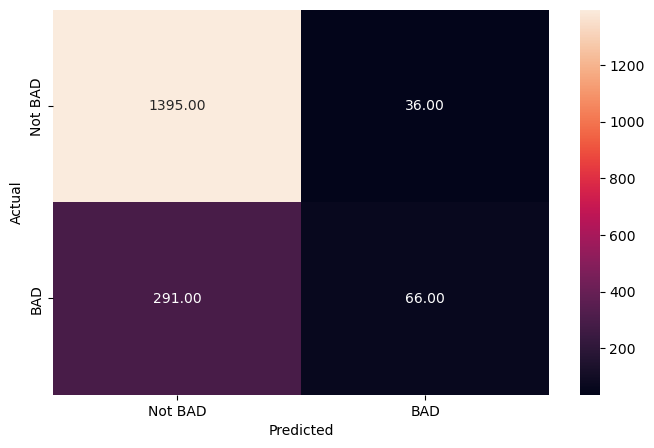

In [182]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(x_test)
metrics_score(y_test, y_pred_test)

**Observations:**
- **We are getting an accuracy of about 84%** on the train and the test datasets.
- However, **the recall for this model is only around 31% for class 1 on the train data and 27% on the test data.**
- As the recall is low, **this model will not perform well**  meaning it will eventually not help in reducing the default rate. 
- The Confusion Matrix reveals that this model exhibits **poor performance** in predicting clients who will default or become severely delinquent.

**Let's check the coefficients and find which variables are leading to default and which can help to reduce it.**

In [185]:
# Printing the coefficients of logistic regression
cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
DELINQ,0.394347
DEROG,0.203935
NINQ,0.125118
CLNO,0.031167
DEBTINC,0.022933
JOB_Self,0.008888
JOB_Sales,0.005988
REASON_HomeImp,0.003146
VALUE,-0.000009
LOAN,-0.000042


**Observations:**

**Features which positively affect on the default rate in order are:**
- DELINQ	
- DEBTINC	
- DEROG
- NINQ	
- JOB_Self
- JOB_Sales	
- REASON_HomeImp	
- JOB_ProfExe
- YOJ
- JOB_Other
- VALUE
- JOB_Office	
- LOAN	
- CLNO
- CLAGE


In [187]:
odds = np.exp(lg.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, x_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False)

,odds
DELINQ,1.483415
DEROG,1.226219
NINQ,1.133282
CLNO,1.031658
DEBTINC,1.023198
JOB_Self,1.008928
JOB_Sales,1.006006
REASON_HomeImp,1.003151
VALUE,0.999991
LOAN,0.999958


**Observations:**

- Clients with a higher number of delinquent credit lines are **2.25 times more likely** to default compared to those without any delinquent credit lines.
- Employees with a high debt-to-income ratio have **1.73 times greater odds** of defaulting than those with lower ratios.
- Clients with major derogatory reports are **1.48 times more likely** to default than those without such reports.
- Clients with a higher number of recent credit inquiries have **1.25 times greater odds** of defaulting compared to those with fewer inquiries.

**The Precision-Recall Curve for Logistic Regression**

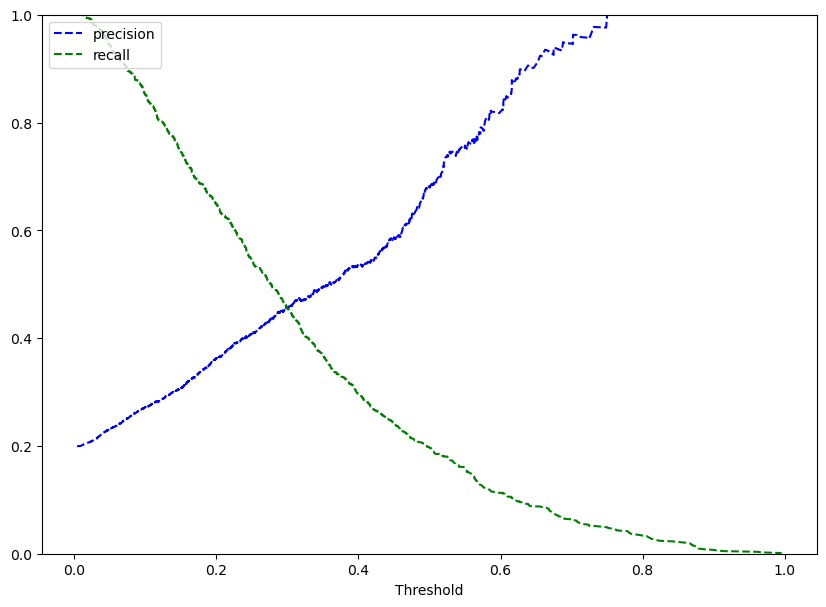

In [190]:
y_scores_lg = lg.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observation:**
- We can see that the precision and the recall are balanced for a threshold of about **0.3**.

**Let's find out the performance of the model at this threshold.**

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      3340
         1.0       0.46      0.45      0.45       832

    accuracy                           0.78      4172
   macro avg       0.66      0.66      0.66      4172
weighted avg       0.78      0.78      0.78      4172



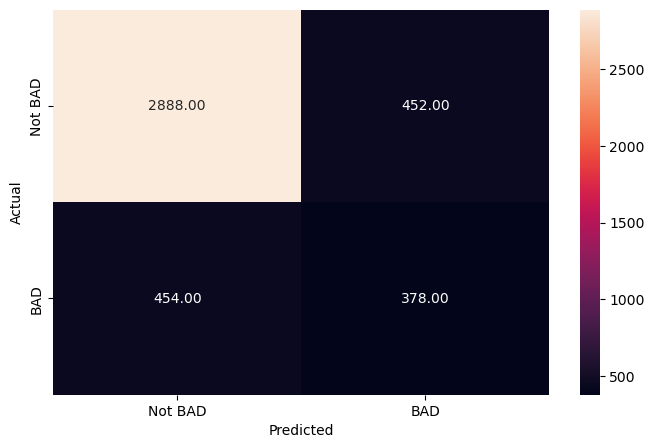

In [192]:
optimal_threshold1 = .3

y_pred_train = lg.predict_proba(x_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

**Observations:**

- **The model performance has improved. The recall has increased significantly for class 1.**
- Let's check the performance on the test data.

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87      1431
         1.0       0.48      0.45      0.47       357

    accuracy                           0.79      1788
   macro avg       0.67      0.67      0.67      1788
weighted avg       0.79      0.79      0.79      1788



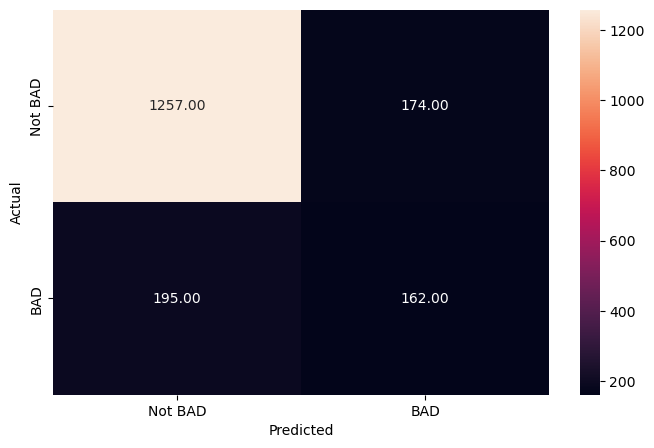

In [194]:
optimal_threshold1 = .3

y_pred_test = lg.predict_proba(x_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

In [195]:
LR_test = model_performance_classification(lg, x_test, y_test)
LR_test

,Precision,Recall,Accuracy
0,0.73723,0.579858,0.817114


**Observations:**

- The model is giving almost **similar performance on the test and the train datasets**, i.e., the model is giving a generalized performance.
- **The recall of the test data has increased** while at the same time, the precision has decreased slightly, which is to be expected while adjusting the threshold.
- The model demonstrates good average recall and precision. However, to align with the business objective, the threshold could be lowered to improve recall, which would reduce the number of false negatives. This adjustment decreases the risk of unrecovered loans, aligning better with the business goal.

### Decision Tree

### **Building a Decision Tree Model**

* We will build our model using the **DecisionTreeClassifier function.**
* If the frequency of class A is 20% and the frequency of class B is 80%, then class B will become the dominant class and **the decision tree will become biased toward the dominant class.**
* **class_weight is a hyperparameter** for the decision tree classifier, and in this case, we can pass a dictionary {0:0.2, 1:0.8} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [199]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

In [200]:
# Fitting decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

**Let's check the model performance of decision tree**

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3340
         1.0       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



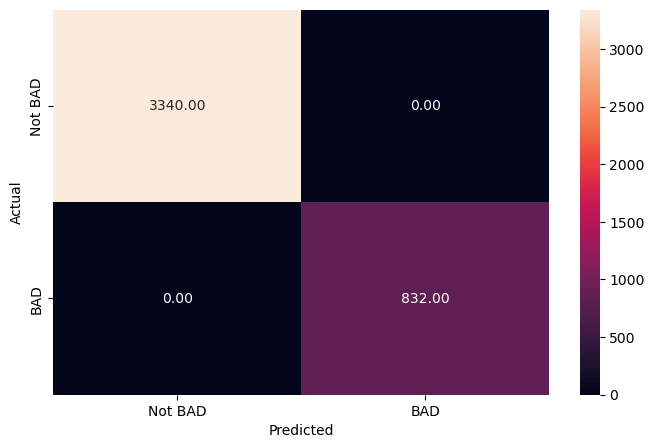

In [202]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- The Decision tree is giving a **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      1431
         1.0       0.67      0.57      0.62       357

    accuracy                           0.86      1788
   macro avg       0.78      0.75      0.76      1788
weighted avg       0.85      0.86      0.85      1788



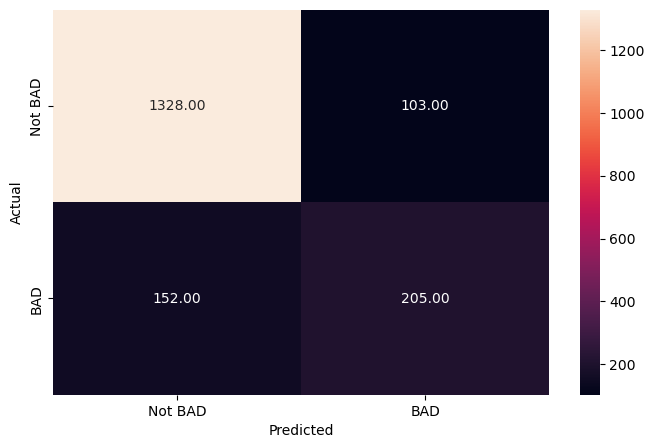

In [204]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [205]:
dtree_test = model_performance_classification(dt,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.781441,0.751126,0.857383


**Observations:**

- The Decision Tree works well on the training data but **not so well on the test data** as the recall is 0.54 in comparison to 1 for the training dataset, i.e., the Decision Tree is **overfitting** the training data.
- The model's precision on the test data is 72%, indicating a 28% chance of false positives. This means the model may incorrectly predict that a person will default, potentially leading the bank to deny loans to creditworthy applicants.
-  with out the model there is a probability of 80%to 20% to predict the behaviour of the customer so the model doesnt add anything to us.

**Let's plot the feature importance and check the most important features.**

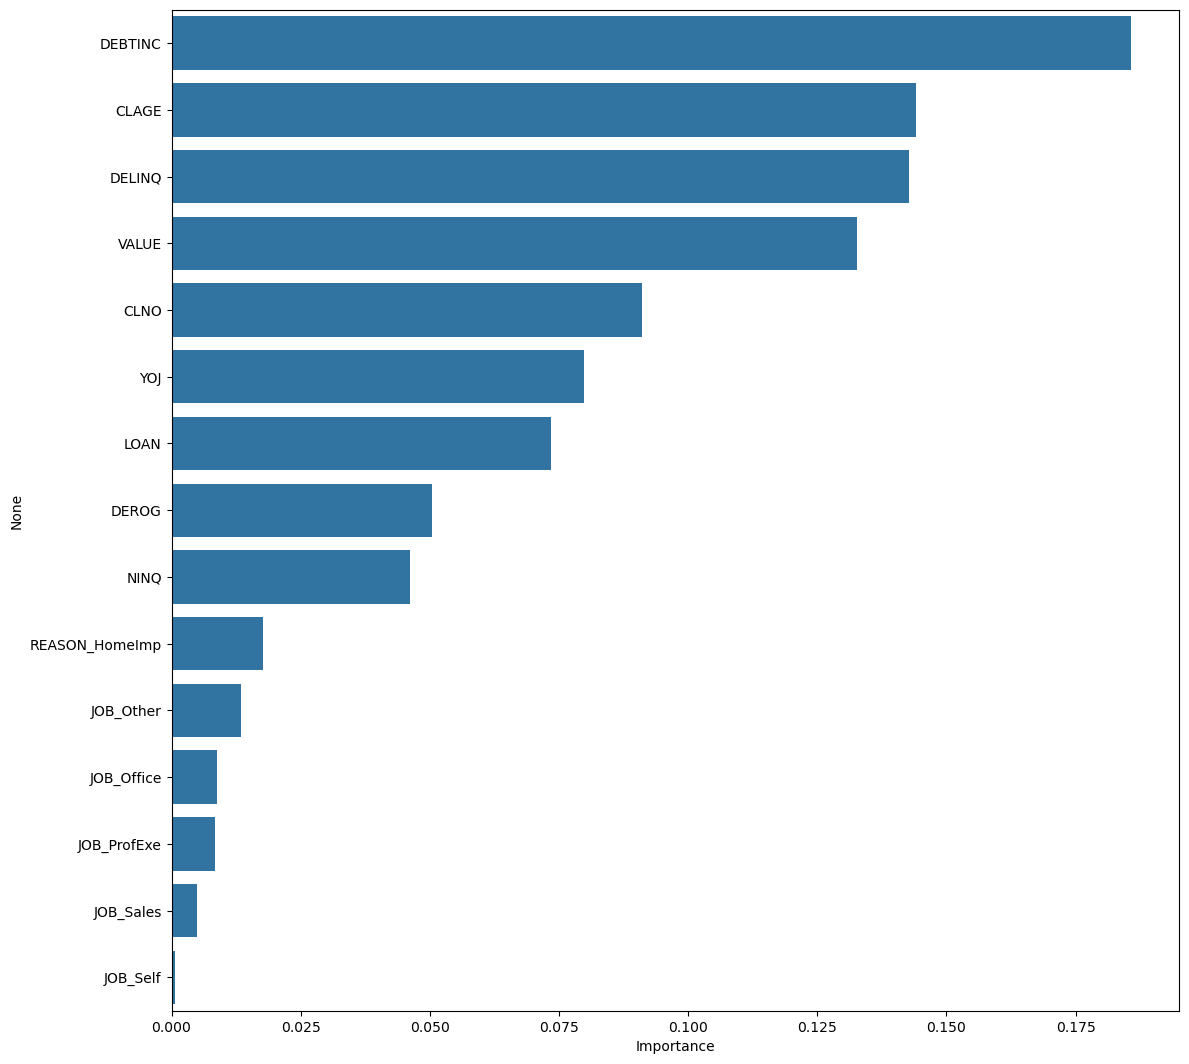

In [208]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance,y=importance_df.index);

**Observations**:

According to the Decision Tree, Debting is the most important feature, followed by CLAGE, DELINQ and LOAN.


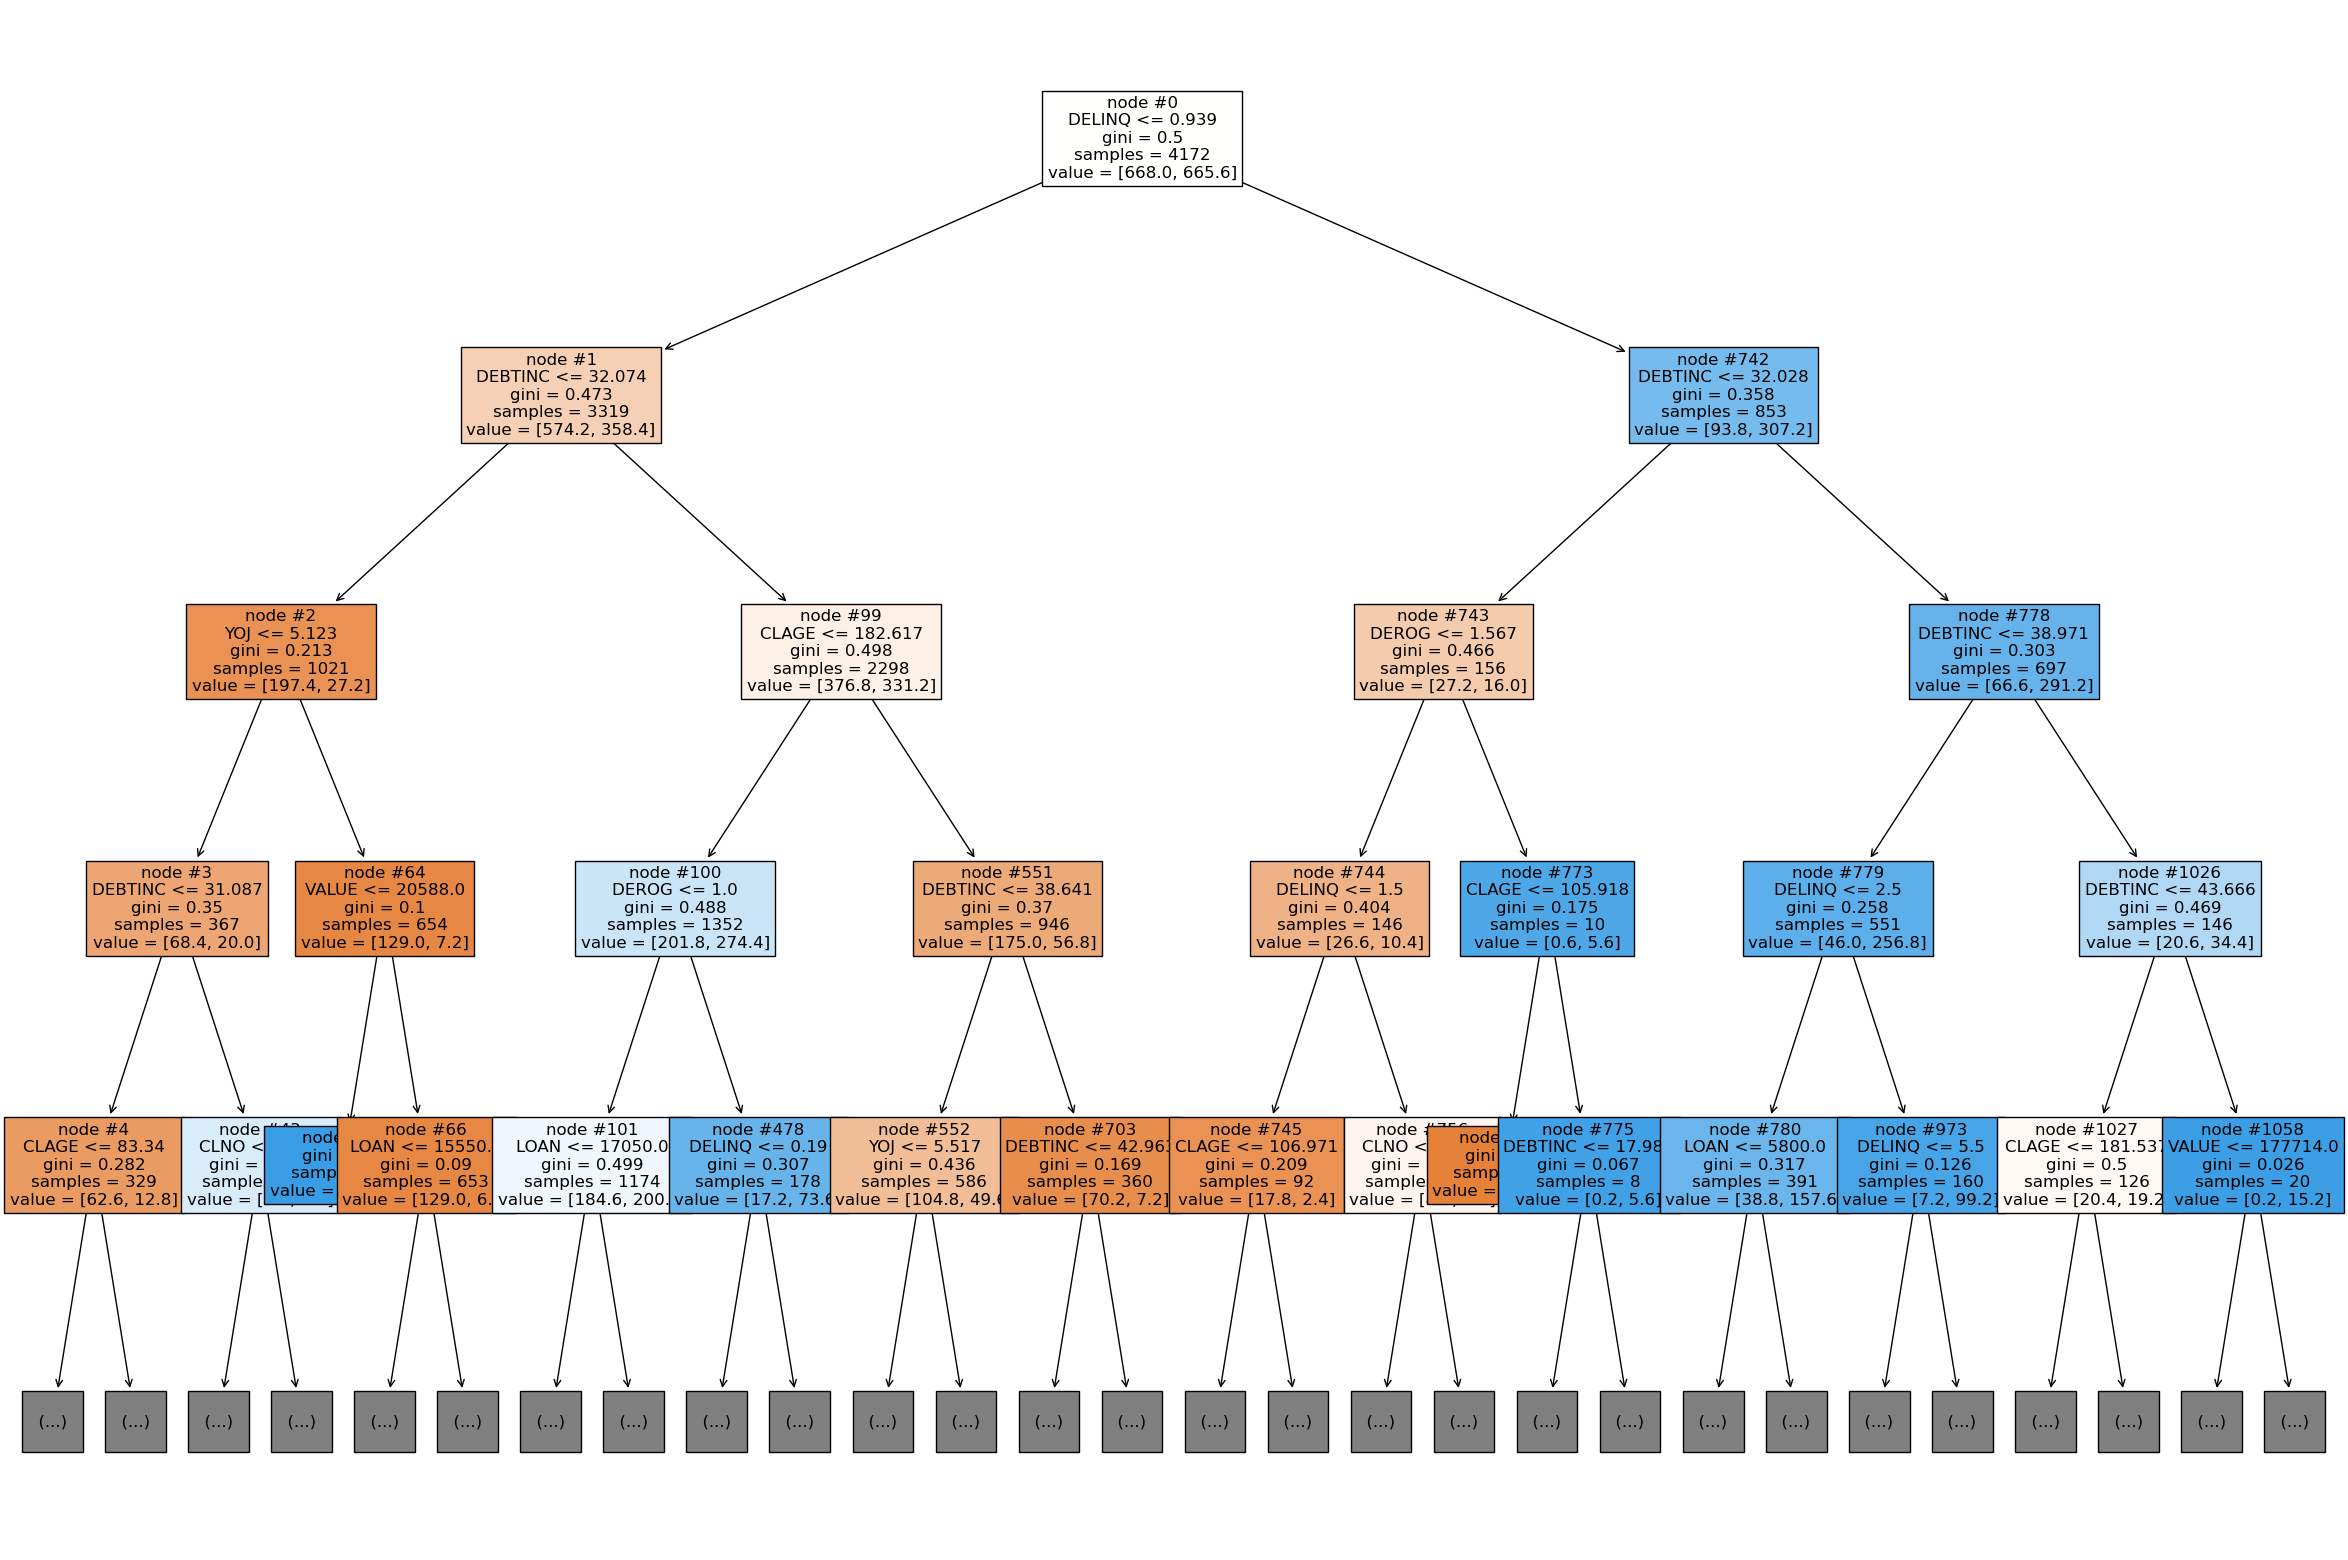

In [210]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = None)

plt.show()

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.


In [212]:

# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(2, 10),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [2, 3, 4]
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score, pos_label=1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=9,
                       min_samples_leaf=3, random_state=1)

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      3340
         1.0       0.70      0.76      0.73       832

    accuracy                           0.89      4172
   macro avg       0.82      0.84      0.83      4172
weighted avg       0.89      0.89      0.89      4172



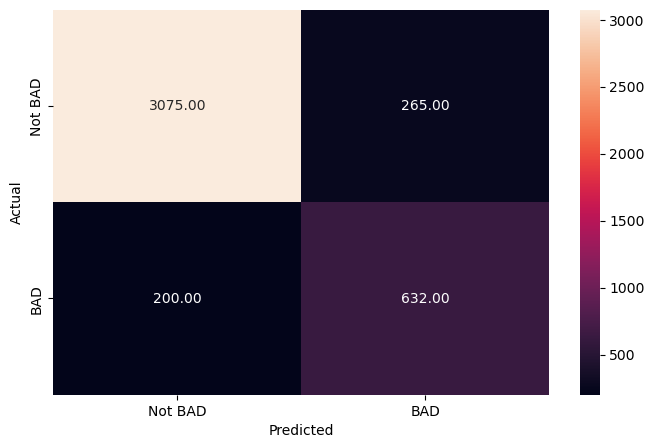

In [213]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      1431
         1.0       0.60      0.57      0.59       357

    accuracy                           0.84      1788
   macro avg       0.75      0.74      0.74      1788
weighted avg       0.84      0.84      0.84      1788



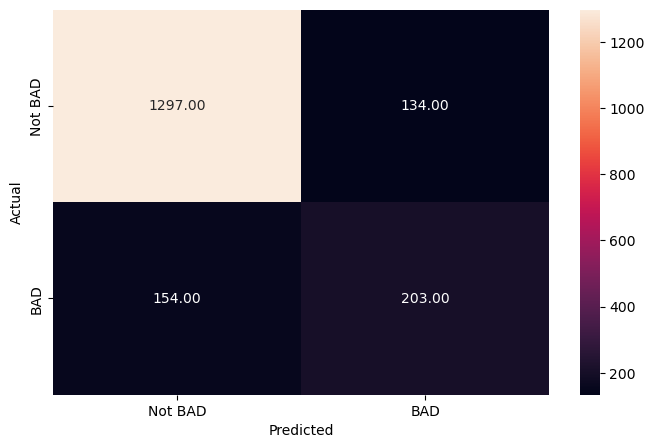

In [214]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [215]:
dtree_tuned_test = model_performance_classification(dtree_estimator,x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.74812,0.737493,0.838926


**Observations:**

- The tuned model is  performing much better in comparison to the model with default values of hyperparameters.
- This model is not overfitting the training data and giving 89% and 84% accuracy on the test and train datasets respectively.

**Let's look at the feature importance of this model and try to analyze why this is happening.**

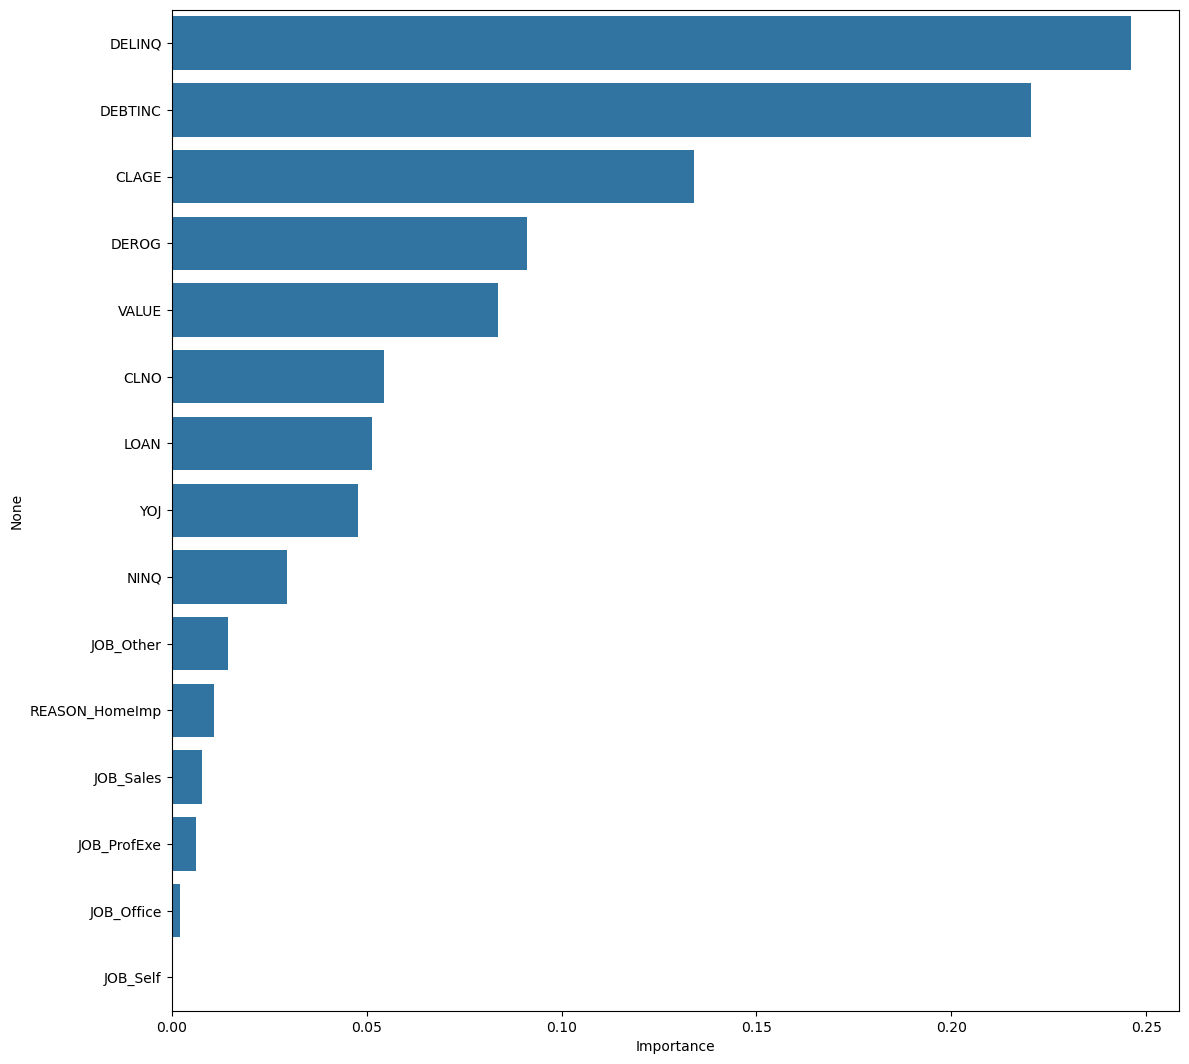

In [217]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index);

According to the modified Decision Tree model, DELINQ is the most important feature, followed by Debting, CLAGE, DEROG.
Three feautures **DELINQ**, **DENTING** and **CLAGE** are on four top important features on both DT models.


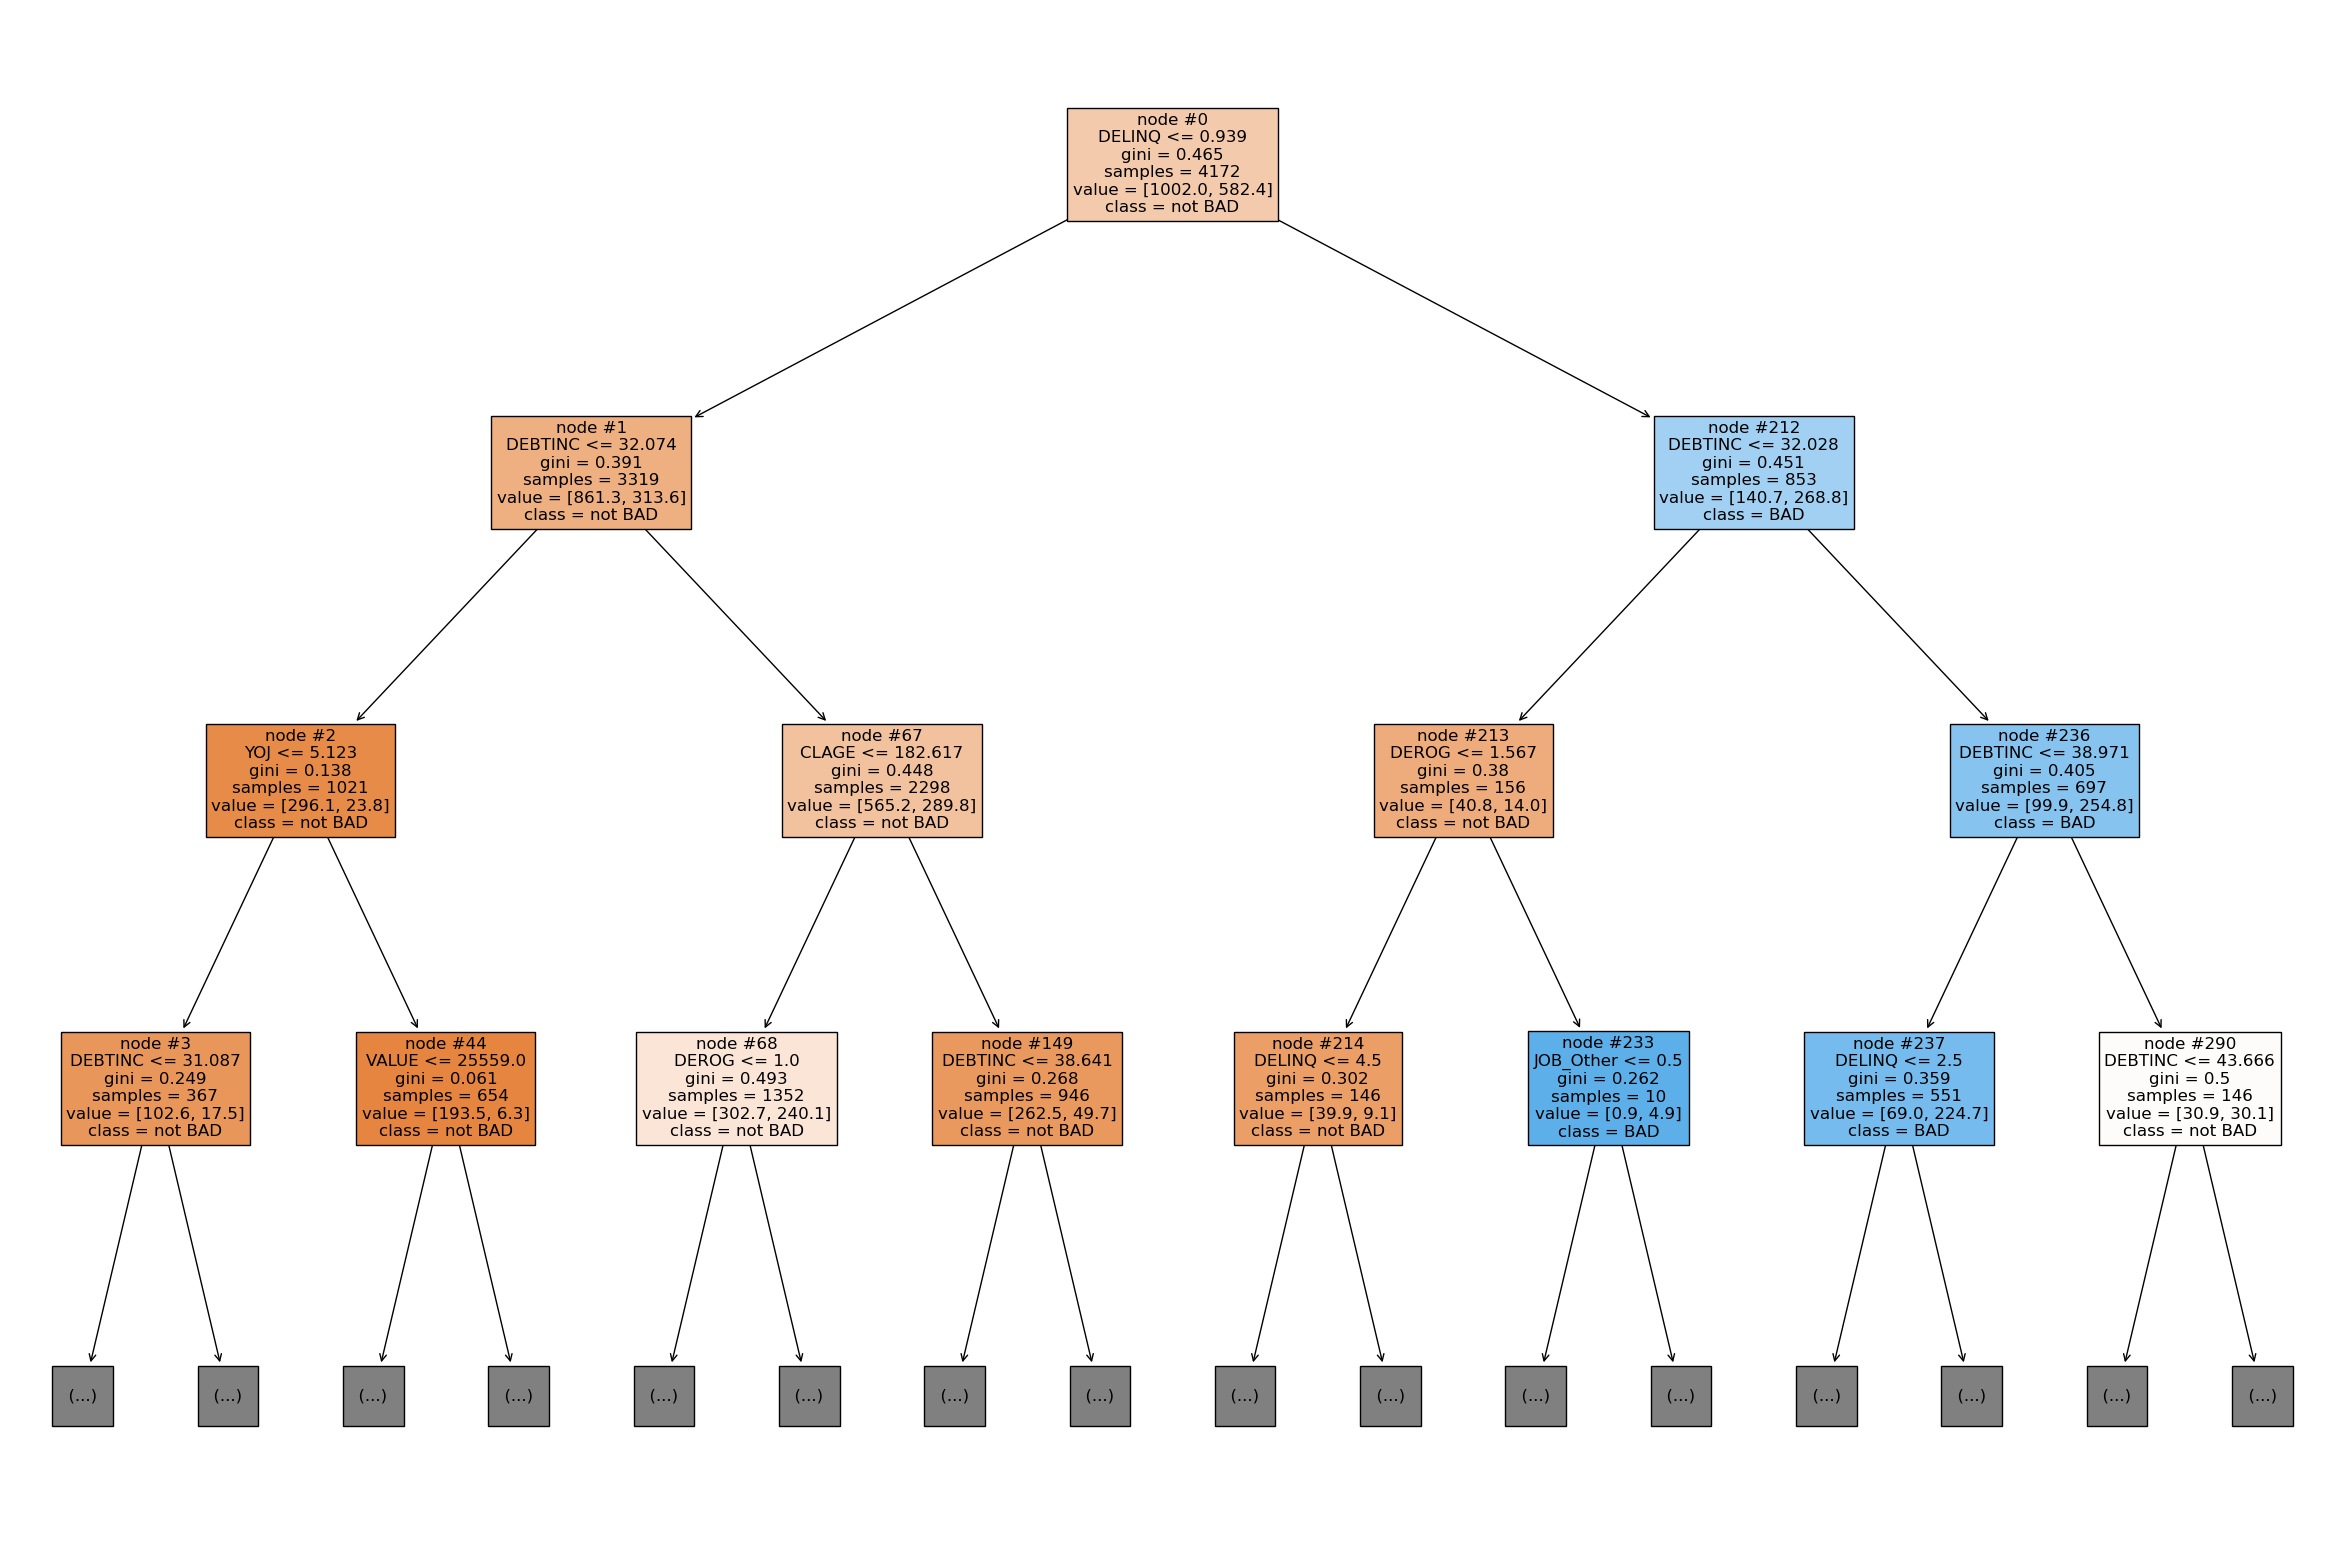

In [219]:
features = list(X.columns)
class_names = ['not BAD', 'BAD']  


plt.figure(figsize = (30, 20))

tree.plot_tree(dtree_estimator, max_depth = 3, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = class_names)

plt.show()

# Observations:

- **Root Node**: The decision tree begins with the condition `DELINQ <= 0.45, indicating that this feature provides the highest information gain among all others.  
- The next key feature in all cases is **DEBTING**.  
- **Blue nodes** in the tree represent default.  


### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [222]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3340
         1.0       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



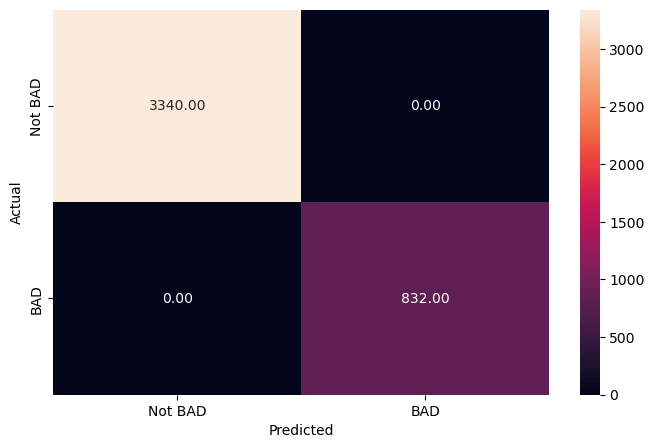

In [223]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      1431
         1.0       0.92      0.55      0.69       357

    accuracy                           0.90      1788
   macro avg       0.91      0.77      0.82      1788
weighted avg       0.90      0.90      0.89      1788



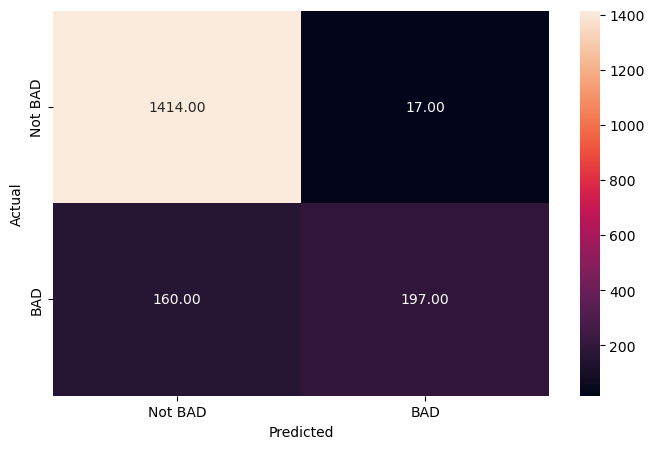

In [224]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

In [225]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.909454,0.76997,0.901007


**Observations:**

- The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 1, while the recall on the test data is  ~ 0.90 for class 0.


### **Random Forest Classifier Hyperparameter Tuning**

In [228]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [50,100, 250],
        "min_samples_leaf": np.arange(2, 10, 2),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [229]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_features=0.7,
                       min_samples_leaf=8, n_estimators=250, random_state=1)

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      3340
         1.0       0.88      0.83      0.85       832

    accuracy                           0.94      4172
   macro avg       0.92      0.90      0.91      4172
weighted avg       0.94      0.94      0.94      4172



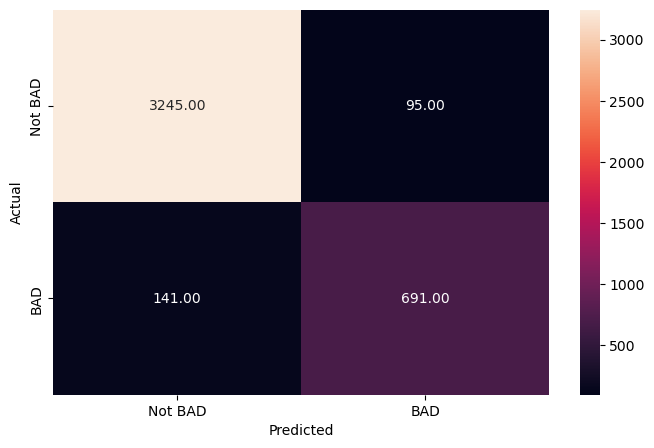

In [230]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93      1431
         1.0       0.74      0.60      0.66       357

    accuracy                           0.88      1788
   macro avg       0.82      0.77      0.79      1788
weighted avg       0.87      0.88      0.87      1788



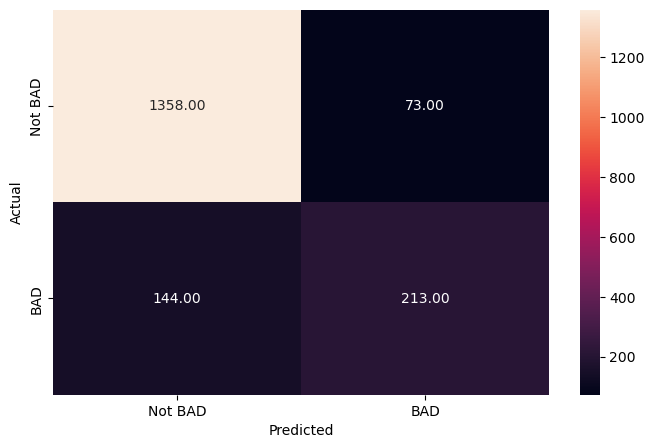

In [231]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [232]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, x_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.824442,0.772813,0.878635


**Observations**:

Overall, the model now performs well.

<Axes: xlabel='Importance', ylabel='None'>

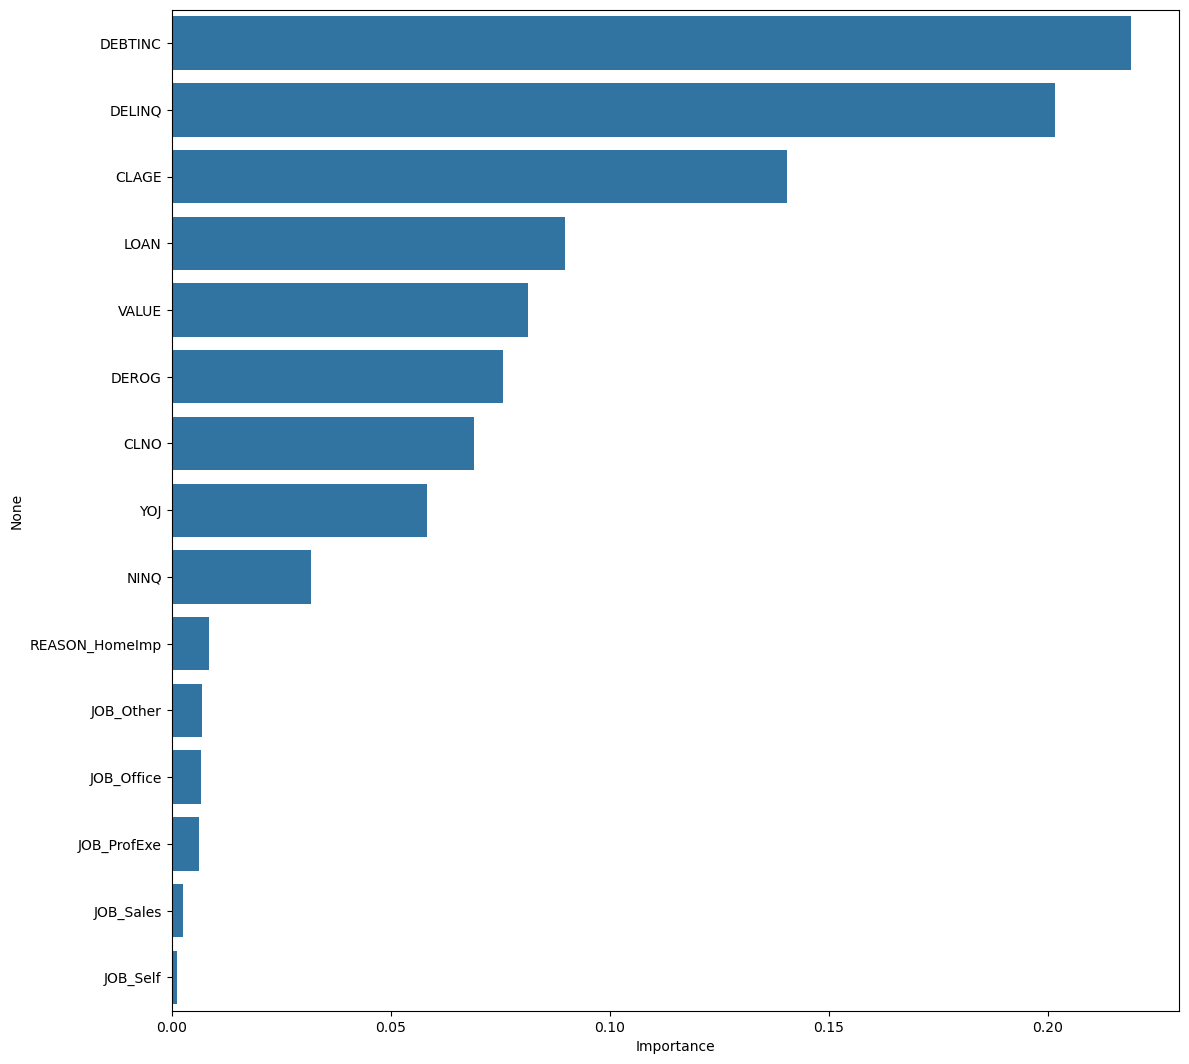

In [234]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index)

In [235]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(x_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_classification(xgb,x_test,y_test)

xgb_perf_test

,Precision,Recall,Accuracy
0,0.899591,0.79974,0.908277


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3340
         1.0       1.00      0.99      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



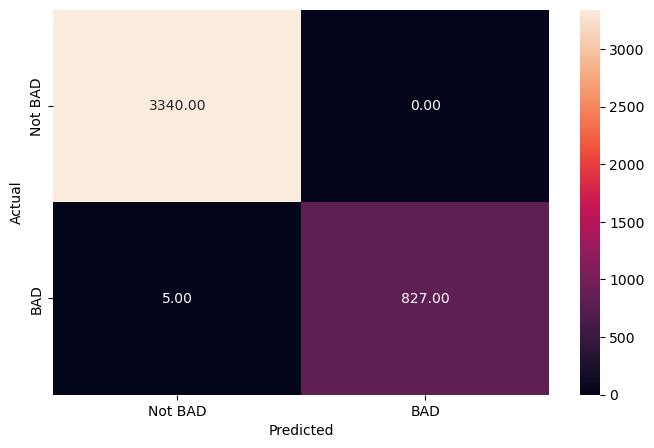

In [236]:
y_pred_train_xgb = xgb.predict(x_train)

metrics_score(y_train, y_pred_train_xgb)

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      1431
         1.0       0.89      0.62      0.73       357

    accuracy                           0.91      1788
   macro avg       0.90      0.80      0.84      1788
weighted avg       0.91      0.91      0.90      1788



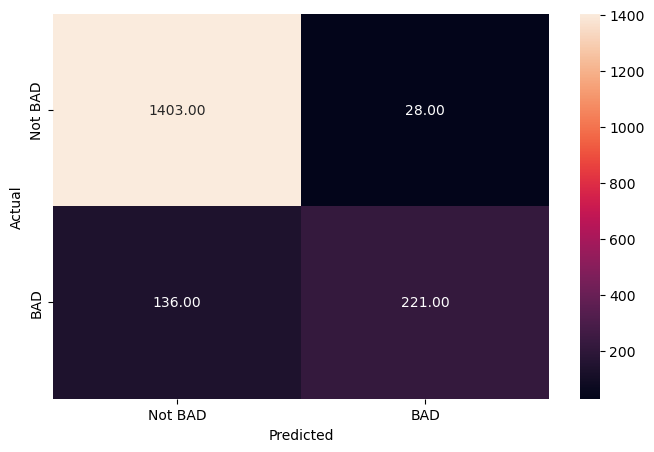

In [237]:
y_pred_test_xgb = xgb.predict(x_test)

metrics_score(y_test, y_pred_test_xgb)

In [238]:
# Model Performance on the test data
xgb_perf_test = model_performance_classification(xgb,x_test,y_test)

xgb_perf_test

,Precision,Recall,Accuracy
0,0.899591,0.79974,0.908277


<Axes: xlabel='Importance', ylabel='None'>

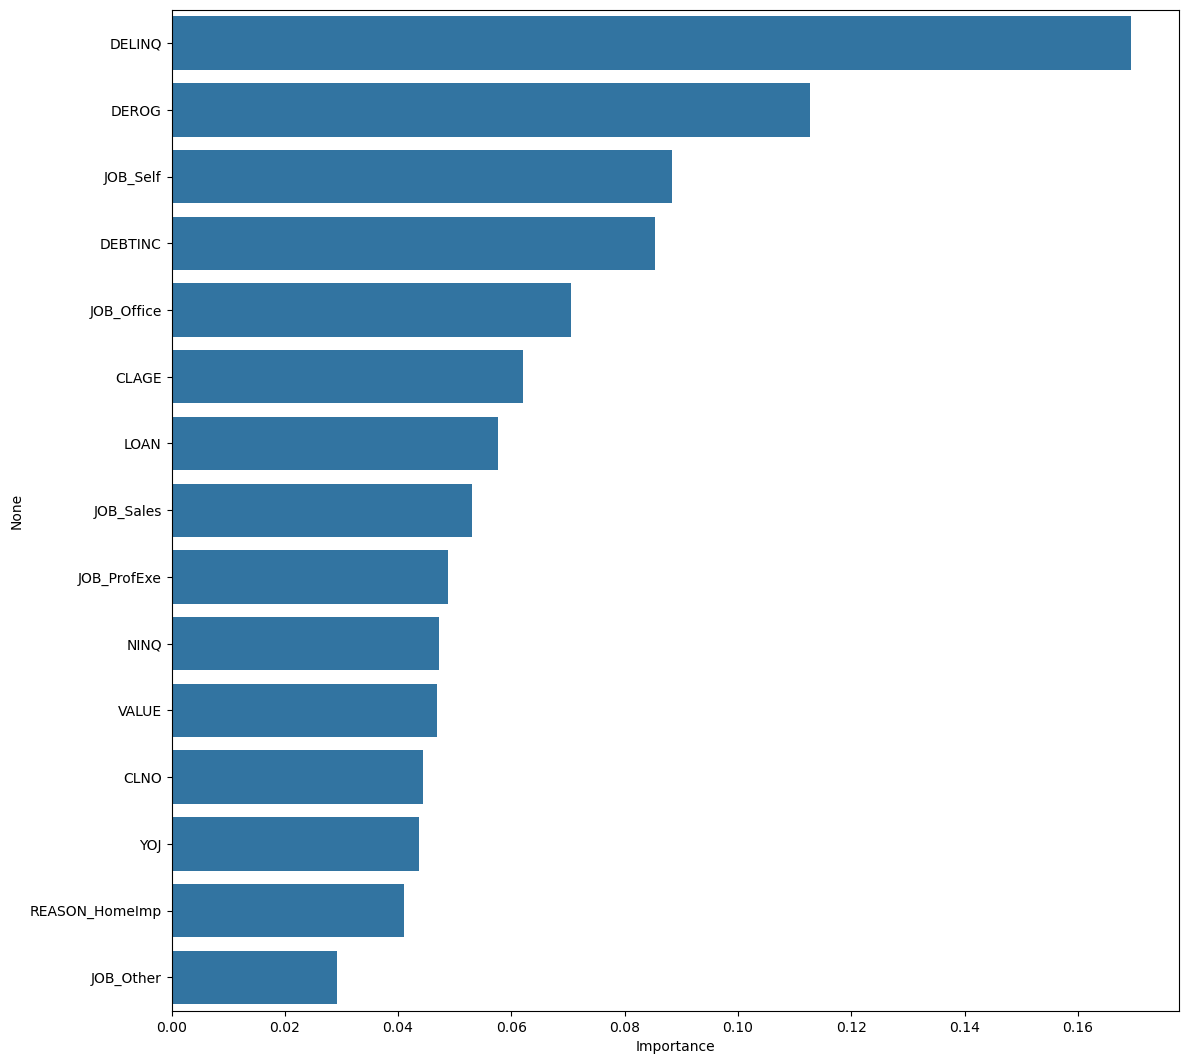

In [239]:
# Plotting feature importance
importances = xgb.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index)

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In [241]:
models_test_comp_df = pd.concat(

    [
        LR_test.T, dtree_test.T, dtree_tuned_test.T,rf_estimator_test.T,
    rf_estimator_tuned_test.T,xgb_perf_test.T
    ],

    axis = 1,
)

models_test_comp_df.columns = ["Logistic Regression",
    "Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Tuned Random Forest classifier",
    "XGBoost classifier"
]

print("Test performance comparison:")

Test performance comparison:


In [242]:
models_test_comp_df

,Logistic Regression,Decision Tree classifier,Tuned Decision Tree classifier,Random Forest classifier,Tuned Random Forest classifier,XGBoost classifier
Precision,0.737230,0.781441,0.748120,0.909454,0.824442,0.899591
Recall,0.579858,0.751126,0.737493,0.769970,0.772813,0.799740
Accuracy,0.817114,0.857383,0.838926,0.901007,0.878635,0.908277


**Observation**  
- Among the applied models, the Random Forest Classifier achieved the highest accuracy, though it may suffer from overfitting. Therefore, the tuned Random Forest Classifier presents a better alternative, as it balances accuracy and recall. Notably, the recall for this model is higher than that of others, making it a preferred choice for this dataset. A higher recall helps mitigate the riskier aspects of decision-making.  

- Additionally, the XGBoost Classifier was introduced and currently stands out as the best-performing model, offering the highest accuracy and recall among all the models tested.

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?
- 
The history of clients, particularly in terms of their delinquent credit lines (DELINQ), major derogatory reports (DEROG), and debt-to-income ratio (DEBTINC), plays a significant role in predicting whether they are likely to default on a loan. These factors provide key insights into a customer's financial behavior and reliability, which are crucial for assessing default risk.

Individuals in "Self-employed" and "Sales" roles are associated with higher risk levels compared to those in other job categories. 

Additionally, the reason for requesting a loan does not significantly impact the prediction of whether an individual will default.


**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

I recommend XGBoost due to its superior accuracy and higher recall. A higher recall indicates fewer false negatives, which is critical in this case, as minimizing false negatives is more important than precision. This ensures a reduced risk of overlooking potential defaulters. 

Following XGBoost, I suggest the tuned Random Forest Classifier. Although it has slightly lower accuracy and recall compared to the standard Random Forest model, the original model shows signs of potential overfitting, making the tuned version a more reliable choice.

All the models evaluated demonstrate an accuracy exceeding 80%, which indicates a strong ability to enhance prediction outcomes, even if marginally. Notably, models like the tuned Random Forest and XGBoost exhibit improvements in prediction rates by approximately 10%, making them highly effective choices for this problem.

To further improve outcomes, testing additional classifiers like K-Nearest Neighbors (KNN), Neural Networks (NN), and Support Vector Machines (SVM) is recommended. These models could offer valuable insights and potentially enhance the performance for this dataset.



 ### Executive Summary:
This project focuses on predicting loan defaults using the Home Equity dataset (HMEQ), which contains records for 5,960 home equity loans. The target variable, BAD, indicates whether a customer defaulted or faced severe delinquency (20% of the cases). By analyzing 12 key features of these loans, multiple machine learning models were built and evaluated to assist banks in identifying high-risk applicants.

The model can make **two types of wrong predictions**:
- Incorrectly predicting that an applicant will default or become severely delinquent when, in reality, they do not.
- Failing to predict that an applicant will default or become severely delinquent when, in fact, they do.\
The second mistake is more critical for the bank because it means giving a loan to someone who cannot repay it. This type of error, known as a **false negative**, is reflected in the **recall metric** of the confusion matrix.


variety of classification models were tested, including:
- Logistic Regression
- Decision Trees
- Random Forests
- XGBoost Classifier
  
The data was split into an 80:20 ratio for training and testing. Using techniques such as Grid Search Cross-Validation, we optimized the models to achieve the best performance metrics.

**Feature Importance**:\
It can be concluded that all features which are **financially attributed are important** in the model.
The **DEBTING** debt-to-income ratio emerged as the most significant factor influencing loan defaults.
Other critical features include DELINQ (Number of delinquent credit lines), DEROG (Number of major derogatory reports), CLAGE (age of the oldest credit line), VALUE (property value), LOAN (loan amount), and CLNO (number of credit lines).
Non-financial attributes like job profile and loan purpose were found to be less significant.

**Final Model Recommendation**:

-	The XGBoost Classifier is the recommended final model because of its excellent performance, achieving:
79% recall for identifying defaulters (Class 1),
89% precision, and
90% overall accuracy on the test data.
This model strikes an ideal balance between recall and precision, meeting the key evaluation criteria effectively.
-	The Tuned Random Forest classifier achieves:
77% recall for identifying defaulters (Class 1),
82% precision, and
88% overall accuracy on the test data.
It ranks second among the models. Both this model and the top-ranking model maintain high accuracy and recall without sacrificing much in precision.



**Interpretability vs. Performance**:
- While models like Tuned Random Forest and XGBoost offer high accuracy, they sacrifice the simplicity and interpretability of Decision Trees.

**Business Impact**:\
By implementing the XGBoost model, the bank can reliably identify high-risk clients and take proactive measures to mitigate potential losses.
The model is robust and does not require further tuning.

**Future Work**:\
Experiment with additional algorithms such as K-Nearest Neighbors (KNN) or other boosting techniques to further improve recall.
Continue focusing on minimizing false negatives to reduce default risks effectively.




 ### Problem and solution summary

 
The primary issue is identifying factors contributing to loan defaults and using these insights to predict which applicants are at the highest risk. A key challenge is the high proportion of missing data (21.3%) in the DEBTINC (debt-to-income ratio) feature, which is also the most impactful predictor of default. This overlap with the 20% default rate highlights the critical role of missing values in predictive accuracy. 

**Proposed Solution Design**
The solution integrates predictive machine learning models and explainable models to address the problem:\
Machine Learning Models: Advanced techniques like XGBoost and Tuned Random Forest were used to predict loan defaults. The predictive models are tuned to prioritize recall beside having high accuracy, ensuring a focus on identifying defaulters while minimizing false negatives. By leveraging these models, the bank can better assess applicant risk, ultimately minimizing default rates and financial losses. Also it provide clarity on why decisions are made, fostering trust and enabling stakeholders to confidently act on the model's insights.



**Explainable Models**:\
 These models help interpret results, assess feature importance, and ensure alignment with real-world expectations. For instance, understanding that DEBTINC and other financial variables (e.g., DELINQ, DEROG, LOAN, CLAGE) play a critical role allows the bank to make data-driven decisions when evaluating loan applications.\


**Data Quality Improvement**:\
Highlighting the impact of missing values on predictions emphasizes the need for better data collection and entry processes, leading to improved future analyses.



 



 ### Key Recommendations for the Bank
 
1.	**Focus on Critical Features**:
- Debt-to-Income Ratio (DEBTINC): The most important factor; lower ratios reflect better financial health.
- Delinquency Rate: Applicants with lower delinquency rates are less likely to default.
- House Value: Higher-valued properties indicate greater financial stability and repayment capacity.
- Actionable Insights: Use decision tree thresholds to support clear and interpretable decision-making.

  
2.	**Model Selection and Use**:
- Pilot Testing: Test the model alongside the current manual process and validate its performance before fully transitioning.
- Handle Missing Data Effectively: Ensure that all financial data is collected from customers before evaluating their loan applications. The system should not begin processing requests if critical financial information, such as key features, is missing.
- Leverage Advanced Machine Learning Methods: Explore other algorithms, such as Boosting Techniques, KNN, Support Vector Machines (SVM), or Neural Networks, for further improvement.
- Perform feature engineering to enhance data quality, such as creating new features or dropping irrelevant columns.
- Create Business Process Guidelines: Develop clear steps for loan evaluation, particularly when dealing with missing or ambiguous data.
Train staff to interpret model outputs and understand the impact of key features like DEBTINC and delinquency rate on risk assessments.
 
3.	**Expected Benefits**:
- Improved Risk Management: Identify high-risk applicants early to reduce financial losses.
- Efficient Loan Processing: Automate decision-making to reduce manual effort and accelerate approvals.
- Optimized Resource Allocation: Focus on high-risk cases while expediting approvals for low-risk applicants.
- Enhanced Customer Satisfaction: Faster and fairer loan evaluations improve the applicant experience.
 
4.	**Cost Considerations**\
	Initial Costs:
- Model development, testing, and deployment.
- Training staff to effectively use the system.
- Ongoing Costs: 
- Model maintenance and periodic retraining with updated data.
- Addressing data quality issues and handling missing information.
 
5.	**Key Risks and Challenges**
- Balancing Recall and Precision: Prioritizing recall may reject good clients, while focusing on precision might miss defaulters. A careful balance is needed.
- Data Quality Issues: Missing values, particularly for DEBTINC, can reduce model performance. Improving data collection processes is critical.
- Stakeholder Resistance: Transitioning to automated processes may face pushback from stakeholders unfamiliar with machine learning systems.
- Ethical and Legal Compliance: Ensure the model adheres to all regulations and avoids unintended bias against specific applicant groups.
